## Local Relational Novelty

> Based on Kyriakou et. al. (2022). Novelty and the Structure of Design Landscapes: A Relational View of Online Innovation Communities

> For a single person similarity score of a particular phase, we will get the compared similarity score of the other people in the previous phase. We will identify the one with the highest similarity score to the other person. The novelty measure is then 1 - the highest similarity score. For each design in a phase, the novelty measure. Novelty is a dependent variable in our model. 

In [1]:
%store -r df1
%store -r df2
%store -r df3
%store -r df4

%store -r df1_bogota0
%store -r df2_bogota0
%store -r df3_bogota0
%store -r df4_bogota0

%store -r df1_bogota1
%store -r df2_bogota1
%store -r df3_bogota1
%store -r df4_bogota1

%store -r df1_bogota2
%store -r df2_bogota2
%store -r df3_bogota2
%store -r df4_bogota2

%store -r subset_bogota0_phase1
%store -r subset_bogota0_phase2
%store -r subset_bogota0_phase3
%store -r overall_phase4_bogota0
%store -r overall_phase5_bogota0
%store -r subset_bogota1_phase1
%store -r subset_bogota1_phase2
%store -r subset_bogota1_phase3
%store -r overall_phase4_bogota1
%store -r overall_phase5_bogota1
%store -r subset_bogota2_phase1
%store -r subset_bogota2_phase2
%store -r subset_bogota2_phase3
%store -r overall_phase4_bogota2
%store -r subset_bogota2_phase5
%store -r subset_bogota3_phase1
%store -r overall_phase1_bogota3
%store -r overall_phase2_bogota3
%store -r subset_bogota3_phase3
%store -r overall_phase4_bogota3
%store -r overall_phase5_bogota3

%store -r overall_phase1
%store -r overall_phase2
%store -r overall_phase3
%store -r overall_phase4
%store -r overall_phase5

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal

In [2]:
pd.set_option('display.max_rows', None)
phase12_bogota3 = df4[~(df4['user2'] == df4['user1'])]
stage1_bogota3 = phase12_bogota3.loc[(phase12_bogota3['user1_phase'] == 1) & (phase12_bogota3['user2_phase'] == 2)]
stage1_bogota3 


user1               user2  user1_phase  user2_phase  \
41             lemartinp           juligarji            1            2   
42             lemartinp           nfmorenog            1            2   
43             lemartinp           AFelipeGA            1            2   
44             lemartinp          mballeng91            1            2   
45             lemartinp            dduartec            1            2   
46             lemartinp           srmedinac            1            2   
47             lemartinp        wilson911013            1            2   
48             lemartinp       wapiravaguens            1            2   
49             lemartinp            davidh17            1            2   
50             lemartinp      DianaNavarrete            1            2   
51             lemartinp           jdmonroyg            1            2   
52             lemartinp           jorge52an            1            2   
53             lemartinp     jscastelblancoh            1            2   
54             lemartinp          juclopezso            1            2   
55             lemartinp           afforeroc            1            2   
56             lemartinp         dagofonseca            1            2   
57             lemartinp         lacardenasv            1            2   
58             lemartinp         oacastillol            1            2   
59             lemartinp          ncampuzano            1            2   
60             lemartinp            adriel62            1            2   
61             lemartinp            capinzor            1            2   
62             lemartinp            ofnanezn            1            2   
63             lemartinp           macuestap            1            2   
64             lemartinp              spenas            1            2   
65             lemartinp         kgbayala528            1            2   
66             lemartinp          lgmoralesa            1            2   
67             lemartinp          ronaldsg20            1            2   
68             lemartinp       cccristanchoc            1            2   
69             lemartinp          jmalvarezd            1            2   
70             lemartinp           smarquezo            1            2   
71             lemartinp             sarizag            1            2   
72             lemartinp            Chranium            1            2   
73             lemartinp             DavidQP            1            2   
74             lemartinp         afceballosr            1            2   
75             lemartinp           lizzyt10h            1            2   
76             lemartinp          NicolasPrr            1            2   
77             lemartinp       jumcorredorro            1            2   
78             lemartinp          feartheGru            1            2   
79             lemartinp        Danielsv9207            1            2   
80             lemartinp  JhonEmmanuelTorres            1            2   
120            juligarji           lemartinp            1            2   
122            juligarji           nfmorenog            1            2   
123            juligarji           AFelipeGA            1            2   
124            juligarji          mballeng91            1            2   
125            juligarji            dduartec            1            2   
126            juligarji           srmedinac            1            2   
127            juligarji        wilson911013            1            2   
128            juligarji       wapiravaguens            1            2   
129            juligarji            davidh17            1            2   
130            juligarji      DianaNavarrete            1            2   
131            juligarji           jdmonroyg            1            2   
132            juligarji           jorge52an            1            2   
133            juligarji     jscastelblancoh            1            2   
134            juligarj

In [3]:
stage1_bogota3_high_similarity = stage1_bogota3.sort_values('similarity', ascending=False).drop_duplicates(['user2']).reset_index(drop=True)
stage1_bogota3_high_similarity

user1               user2  user1_phase  user2_phase  \
0   JhonEmmanuelTorres        Danielsv9207            1            2   
1         Danielsv9207        wilson911013            1            2   
2         wilson911013  JhonEmmanuelTorres            1            2   
3           feartheGru           jdmonroyg            1            2   
4         wilson911013          feartheGru            1            2   
5        wapiravaguens           lizzyt10h            1            2   
6        wapiravaguens           AFelipeGA            1            2   
7            AFelipeGA       wapiravaguens            1            2   
8           lgmoralesa            capinzor            1            2   
9            srmedinac         lacardenasv            1            2   
10           srmedinac          ncampuzano            1            2   
11           AFelipeGA           afforeroc            1            2   
12          ncampuzano            adriel62            1            2   
13            capinzor              spenas            1            2   
14       wapiravaguens            Chranium            1            2   
15            davidh17           macuestap            1            2   
16           nfmorenog            ofnanezn            1            2   
17            dduartec         dagofonseca            1            2   
18           srmedinac            davidh17            1            2   
19       wapiravaguens      DianaNavarrete            1            2   
20         afceballosr       jumcorredorro            1            2   
21            capinzor          lgmoralesa            1            2   
22       jumcorredorro            dduartec            1            2   
23           lizzyt10h           smarquezo            1            2   
24           smarquezo          juclopezso            1            2   
25         dagofonseca          jmalvarezd            1            2   
26           nfmorenog           lemartinp            1            2   
27          ronaldsg20             sarizag            1            2   
28       jumcorredorro         afceballosr            1            2   
29             sarizag          ronaldsg20            1            2   
30         dagofonseca           nfmorenog            1            2   
31            adriel62          NicolasPrr            1            2   
32           afforeroc             DavidQP            1            2   
33          jmalvarezd         oacastillol            1            2   
34            davidh17     jscastelblancoh            1            2   
35       jumcorredorro         kgbayala528            1            2   
36           lemartinp       cccristanchoc            1            2   
37          lgmoralesa           srmedinac            1            2   
38          jmalvarezd           jorge52an            1            2   
39          jmalvarezd           juligarji            1            2   
40           macuestap          mballeng91            1            2   

    similarity  
0     1.000000  
1     1.000000  
2     1.000000  
3     1.000000  
4     1.000000  
5     0.600000  
6     0.600000  
7     0.600000  
8     0.586207  
9     0.575342  
10    0.571429  
11    0.571429  
12    0.568627  
13    0.555556  
14    0.500000  
15    0.454545  
16    0.409091  
17    0.407407  
18    0.383562  
19    0.375000  
20    0.375000  
21    0.369565  
22    0.333333  
23    0.333333  
24    0.333333  
25    0.303571  
26    0.291667  
27    0.289474  
28    0.280702  
29    0.266667  
30    0.254902  
31    0.250000  
32    0.250000  
33    0.230769  
34    0.190476  
35    0.151786  
36    0.133333  
37    0.121622  
38    0.074074  
39    0.057325  
40    0.031088

In [4]:
import matplotlib.pyplot as plt
phase23_bogota3 = df3[~(df3['user1'] == df3['user2'])]
stage2_bogota3 = phase23_bogota3.loc[(phase23_bogota3['user1_phase'] == 2) & (phase23_bogota3['user2_phase'] == 3)]
stage2_bogota3 

user1               user2  user1_phase  user2_phase  \
41             lemartinp           juligarji            2            3   
42             lemartinp           nfmorenog            2            3   
43             lemartinp           AFelipeGA            2            3   
44             lemartinp          mballeng91            2            3   
45             lemartinp            dduartec            2            3   
46             lemartinp           srmedinac            2            3   
47             lemartinp        wilson911013            2            3   
48             lemartinp       wapiravaguens            2            3   
49             lemartinp            davidh17            2            3   
50             lemartinp      DianaNavarrete            2            3   
51             lemartinp           jdmonroyg            2            3   
52             lemartinp           jorge52an            2            3   
53             lemartinp     jscastelblancoh            2            3   
54             lemartinp          juclopezso            2            3   
55             lemartinp           afforeroc            2            3   
56             lemartinp         dagofonseca            2            3   
57             lemartinp         lacardenasv            2            3   
58             lemartinp         oacastillol            2            3   
59             lemartinp          ncampuzano            2            3   
60             lemartinp            adriel62            2            3   
61             lemartinp            capinzor            2            3   
62             lemartinp            ofnanezn            2            3   
63             lemartinp           macuestap            2            3   
64             lemartinp              spenas            2            3   
65             lemartinp         kgbayala528            2            3   
66             lemartinp          lgmoralesa            2            3   
67             lemartinp          ronaldsg20            2            3   
68             lemartinp       cccristanchoc            2            3   
69             lemartinp          jmalvarezd            2            3   
70             lemartinp           smarquezo            2            3   
71             lemartinp             sarizag            2            3   
72             lemartinp            Chranium            2            3   
73             lemartinp             DavidQP            2            3   
74             lemartinp         afceballosr            2            3   
75             lemartinp           lizzyt10h            2            3   
76             lemartinp          NicolasPrr            2            3   
77             lemartinp       jumcorredorro            2            3   
78             lemartinp          feartheGru            2            3   
79             lemartinp        Danielsv9207            2            3   
80             lemartinp  JhonEmmanuelTorres            2            3   
120            juligarji           lemartinp            2            3   
122            juligarji           nfmorenog            2            3   
123            juligarji           AFelipeGA            2            3   
124            juligarji          mballeng91            2            3   
125            juligarji            dduartec            2            3   
126            juligarji           srmedinac            2            3   
127            juligarji        wilson911013            2            3   
128            juligarji       wapiravaguens            2            3   
129            juligarji            davidh17            2            3   
130            juligarji      DianaNavarrete            2            3   
131            juligarji           jdmonroyg            2            3   
132            juligarji           jorge52an            2            3   
133            juligarji     jscastelblancoh            2            3   
134            juligarj

In [5]:
stage2_bogota3_high_similarity = stage2_bogota3.sort_values('similarity', ascending=False).drop_duplicates(['user2']).reset_index(drop=True)
stage2_bogota3_high_similarity

user1               user2  user1_phase  user2_phase  \
0   JhonEmmanuelTorres        Danielsv9207            2            3   
1            jdmonroyg          feartheGru            2            3   
2            jdmonroyg        wilson911013            2            3   
3         wilson911013  JhonEmmanuelTorres            2            3   
4         wilson911013           jdmonroyg            2            3   
5          lacardenasv            capinzor            2            3   
6            lizzyt10h       wapiravaguens            2            3   
7            lizzyt10h           AFelipeGA            2            3   
8            AFelipeGA           afforeroc            2            3   
9           ncampuzano            adriel62            2            3   
10            adriel62          ncampuzano            2            3   
11            capinzor              spenas            2            3   
12           afforeroc           lizzyt10h            2            3   
13       wapiravaguens            Chranium            2            3   
14         dagofonseca         lacardenasv            2            3   
15       wapiravaguens      DianaNavarrete            2            3   
16           lizzyt10h           smarquezo            2            3   
17           macuestap             sarizag            2            3   
18             sarizag           macuestap            2            3   
19         oacastillol          jmalvarezd            2            3   
20           afforeroc       cccristanchoc            2            3   
21           afforeroc          juclopezso            2            3   
22            ofnanezn             DavidQP            2            3   
23            capinzor          lgmoralesa            2            3   
24             DavidQP            ofnanezn            2            3   
25       jumcorredorro            davidh17            2            3   
26          jmalvarezd           nfmorenog            2            3   
27           macuestap           lemartinp            2            3   
28       jumcorredorro         afceballosr            2            3   
29           afforeroc          NicolasPrr            2            3   
30          jmalvarezd         oacastillol            2            3   
31             sarizag          ronaldsg20            2            3   
32           nfmorenog         kgbayala528            2            3   
33            davidh17       jumcorredorro            2            3   
34             sarizag     jscastelblancoh            2            3   
35       jumcorredorro            dduartec            2            3   
36     jscastelblancoh           srmedinac            2            3   
37          jmalvarezd         dagofonseca            2            3   
38          ncampuzano           jorge52an            2            3   
39          ronaldsg20          mballeng91            2            3   
40     jscastelblancoh           juligarji            2            3   

    similarity  
0     1.000000  
1     1.000000  
2     1.000000  
3     1.000000  
4     1.000000  
5     0.608108  
6     0.600000  
7     0.600000  
8     0.571429  
9     0.557692  
10    0.557692  
11    0.555556  
12    0.500000  
13    0.500000  
14    0.394737  
15    0.375000  
16    0.333333  
17    0.323529  
18    0.323529  
19    0.313725  
20    0.307692  
21    0.300000  
22    0.280000  
23    0.274194  
24    0.272727  
25    0.262500  
26    0.253012  
27    0.240000  
28    0.238806  
29    0.227273  
30    0.225166  
31    0.206897  
32    0.179688  
33    0.179487  
34    0.161290  
35    0.142857  
36    0.109756  
37    0.082437  
38    0.034682  
39    0.015625  
40    0.007564

In [6]:
import matplotlib.pyplot as plt
phase34_bogota3 = df2[~(df2['user1'] == df2['user2'])]
stage3_bogota3 = phase34_bogota3.loc[(phase34_bogota3['user1_phase'] == 3) & (phase34_bogota3['user2_phase'] == 4)]
stage3_bogota3 

user1               user2  user1_phase  user2_phase  \
41             lemartinp           juligarji            3            4   
42             lemartinp           nfmorenog            3            4   
43             lemartinp           AFelipeGA            3            4   
44             lemartinp          mballeng91            3            4   
45             lemartinp            dduartec            3            4   
46             lemartinp           srmedinac            3            4   
47             lemartinp        wilson911013            3            4   
48             lemartinp       wapiravaguens            3            4   
49             lemartinp            davidh17            3            4   
50             lemartinp      DianaNavarrete            3            4   
51             lemartinp           jdmonroyg            3            4   
52             lemartinp           jorge52an            3            4   
53             lemartinp     jscastelblancoh            3            4   
54             lemartinp          juclopezso            3            4   
55             lemartinp           afforeroc            3            4   
56             lemartinp         dagofonseca            3            4   
57             lemartinp         lacardenasv            3            4   
58             lemartinp         oacastillol            3            4   
59             lemartinp          ncampuzano            3            4   
60             lemartinp            adriel62            3            4   
61             lemartinp            capinzor            3            4   
62             lemartinp            ofnanezn            3            4   
63             lemartinp           macuestap            3            4   
64             lemartinp              spenas            3            4   
65             lemartinp         kgbayala528            3            4   
66             lemartinp          lgmoralesa            3            4   
67             lemartinp          ronaldsg20            3            4   
68             lemartinp       cccristanchoc            3            4   
69             lemartinp          jmalvarezd            3            4   
70             lemartinp           smarquezo            3            4   
71             lemartinp             sarizag            3            4   
72             lemartinp            Chranium            3            4   
73             lemartinp             DavidQP            3            4   
74             lemartinp         afceballosr            3            4   
75             lemartinp           lizzyt10h            3            4   
76             lemartinp          NicolasPrr            3            4   
77             lemartinp       jumcorredorro            3            4   
78             lemartinp          feartheGru            3            4   
79             lemartinp        Danielsv9207            3            4   
80             lemartinp  JhonEmmanuelTorres            3            4   
120            juligarji           lemartinp            3            4   
122            juligarji           nfmorenog            3            4   
123            juligarji           AFelipeGA            3            4   
124            juligarji          mballeng91            3            4   
125            juligarji            dduartec            3            4   
126            juligarji           srmedinac            3            4   
127            juligarji        wilson911013            3            4   
128            juligarji       wapiravaguens            3            4   
129            juligarji            davidh17            3            4   
130            juligarji      DianaNavarrete            3            4   
131            juligarji           jdmonroyg            3            4   
132            juligarji           jorge52an            3            4   
133            juligarji     jscastelblancoh            3            4   
134            juligarj

In [7]:
stage3_bogota3_high_similarity = stage3_bogota3.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage3_bogota3_high_similarity

user1               user2  user1_phase  user2_phase  \
0   JhonEmmanuelTorres        Danielsv9207            3            4   
1            jdmonroyg          feartheGru            3            4   
2           feartheGru           jdmonroyg            3            4   
3         wilson911013  JhonEmmanuelTorres            3            4   
4            AFelipeGA       wapiravaguens            3            4   
5        wapiravaguens           AFelipeGA            3            4   
6            AFelipeGA           afforeroc            3            4   
7            AFelipeGA            Chranium            3            4   
8            afforeroc           lizzyt10h            3            4   
9            AFelipeGA      DianaNavarrete            3            4   
10            capinzor          ncampuzano            3            4   
11         dagofonseca          NicolasPrr            3            4   
12           lizzyt10h           macuestap            3            4   
13            capinzor          lgmoralesa            3            4   
14           macuestap             sarizag            3            4   
15            adriel62         lacardenasv            3            4   
16           lemartinp           smarquezo            3            4   
17          ncampuzano          jmalvarezd            3            4   
18             DavidQP           lemartinp            3            4   
19          jmalvarezd           nfmorenog            3            4   
20          lgmoralesa              spenas            3            4   
21           macuestap         afceballosr            3            4   
22          jmalvarezd         oacastillol            3            4   
23          ncampuzano            davidh17            3            4   
24           afforeroc       cccristanchoc            3            4   
25            adriel62          juclopezso            3            4   
26             DavidQP            ofnanezn            3            4   
27           nfmorenog         kgbayala528            3            4   
28     jscastelblancoh           srmedinac            3            4   
29          lgmoralesa             DavidQP            3            4   
30          jmalvarezd            dduartec            3            4   
31             sarizag          ronaldsg20            3            4   
32           afforeroc        wilson911013            3            4   
33            davidh17       jumcorredorro            3            4   
34          jmalvarezd         dagofonseca            3            4   
35            davidh17     jscastelblancoh            3            4   
36       jumcorredorro           jorge52an            3            4   
37           juligarji            capinzor            3            4   
38           juligarji            adriel62            3            4   
39          ronaldsg20          mballeng91            3            4   
40         dagofonseca           juligarji            3            4   

    similarity  
0     1.000000  
1     1.000000  
2     1.000000  
3     1.000000  
4     0.600000  
5     0.600000  
6     0.571429  
7     0.500000  
8     0.500000  
9     0.375000  
10    0.347368  
11    0.342981  
12    0.333333  
13    0.320388  
14    0.305556  
15    0.300000  
16    0.285714  
17    0.283784  
18    0.264706  
19    0.247059  
20    0.246154  
21    0.222222  
22    0.215190  
23    0.214953  
24    0.190476  
25    0.189655  
26    0.186047  
27    0.176471  
28    0.137931  
29    0.136364  
30    0.135714  
31    0.123967  
32    0.111111  
33    0.106796  
34    0.087413  
35    0.086364  
36    0.044077  
37    0.030081  
38    0.023110  
39    0.018519  
40    0.011507

In [8]:
import matplotlib.pyplot as plt
phase45_bogota3 = df1[~(df1['user1'] == df1['user2'])]
stage4_bogota3 = phase45_bogota3.loc[(phase45_bogota3['user1_phase'] == 4) & (phase45_bogota3['user2_phase'] == 5)]
stage4_bogota3 

user1               user2  user1_phase  user2_phase  \
41             lemartinp           juligarji            4            5   
42             lemartinp           nfmorenog            4            5   
43             lemartinp           AFelipeGA            4            5   
44             lemartinp          mballeng91            4            5   
45             lemartinp            dduartec            4            5   
46             lemartinp           srmedinac            4            5   
47             lemartinp        wilson911013            4            5   
48             lemartinp       wapiravaguens            4            5   
49             lemartinp            davidh17            4            5   
50             lemartinp      DianaNavarrete            4            5   
51             lemartinp           jdmonroyg            4            5   
52             lemartinp           jorge52an            4            5   
53             lemartinp     jscastelblancoh            4            5   
54             lemartinp          juclopezso            4            5   
55             lemartinp           afforeroc            4            5   
56             lemartinp         dagofonseca            4            5   
57             lemartinp         lacardenasv            4            5   
58             lemartinp         oacastillol            4            5   
59             lemartinp          ncampuzano            4            5   
60             lemartinp            adriel62            4            5   
61             lemartinp            capinzor            4            5   
62             lemartinp            ofnanezn            4            5   
63             lemartinp           macuestap            4            5   
64             lemartinp              spenas            4            5   
65             lemartinp         kgbayala528            4            5   
66             lemartinp          lgmoralesa            4            5   
67             lemartinp          ronaldsg20            4            5   
68             lemartinp       cccristanchoc            4            5   
69             lemartinp          jmalvarezd            4            5   
70             lemartinp           smarquezo            4            5   
71             lemartinp             sarizag            4            5   
72             lemartinp            Chranium            4            5   
73             lemartinp             DavidQP            4            5   
74             lemartinp         afceballosr            4            5   
75             lemartinp           lizzyt10h            4            5   
76             lemartinp          NicolasPrr            4            5   
77             lemartinp       jumcorredorro            4            5   
78             lemartinp          feartheGru            4            5   
79             lemartinp        Danielsv9207            4            5   
80             lemartinp  JhonEmmanuelTorres            4            5   
120            juligarji           lemartinp            4            5   
122            juligarji           nfmorenog            4            5   
123            juligarji           AFelipeGA            4            5   
124            juligarji          mballeng91            4            5   
125            juligarji            dduartec            4            5   
126            juligarji           srmedinac            4            5   
127            juligarji        wilson911013            4            5   
128            juligarji       wapiravaguens            4            5   
129            juligarji            davidh17            4            5   
130            juligarji      DianaNavarrete            4            5   
131            juligarji           jdmonroyg            4            5   
132            juligarji           jorge52an            4            5   
133            juligarji     jscastelblancoh            4            5   
134            juligarj

In [9]:
stage4_bogota3_high_similarity = stage4_bogota3.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage4_bogota3_high_similarity

user1               user2  user1_phase  user2_phase  \
0   JhonEmmanuelTorres        Danielsv9207            4            5   
1           feartheGru  JhonEmmanuelTorres            4            5   
2   JhonEmmanuelTorres          feartheGru            4            5   
3            AFelipeGA       wapiravaguens            4            5   
4        wapiravaguens           AFelipeGA            4            5   
5            AFelipeGA           afforeroc            4            5   
6            AFelipeGA            Chranium            4            5   
7           lgmoralesa           smarquezo            4            5   
8            afforeroc           lizzyt10h            4            5   
9            afforeroc           jdmonroyg            4            5   
10           AFelipeGA      DianaNavarrete            4            5   
11          NicolasPrr         dagofonseca            4            5   
12           lizzyt10h           macuestap            4            5   
13           nfmorenog          jmalvarezd            4            5   
14          jmalvarezd           nfmorenog            4            5   
15           macuestap             sarizag            4            5   
16             sarizag           lemartinp            4            5   
17           lizzyt10h         afceballosr            4            5   
18          lgmoralesa              spenas            4            5   
19              spenas          lgmoralesa            4            5   
20          jmalvarezd          NicolasPrr            4            5   
21          lgmoralesa            davidh17            4            5   
22           nfmorenog         kgbayala528            4            5   
23             sarizag          ronaldsg20            4            5   
24          jmalvarezd          juclopezso            4            5   
25       jumcorredorro         lacardenasv            4            5   
26             sarizag            ofnanezn            4            5   
27         lacardenasv       jumcorredorro            4            5   
28          jmalvarezd         oacastillol            4            5   
29           lemartinp             DavidQP            4            5   
30          jmalvarezd          ncampuzano            4            5   
31         lacardenasv            adriel62            4            5   
32           afforeroc       cccristanchoc            4            5   
33           smarquezo           srmedinac            4            5   
34           afforeroc        wilson911013            4            5   
35            davidh17     jscastelblancoh            4            5   
36         lacardenasv           jorge52an            4            5   
37          NicolasPrr            capinzor            4            5   
38           juligarji            dduartec            4            5   
39            capinzor           juligarji            4            5   
40       jumcorredorro          mballeng91            4            5   

    similarity  
0     1.000000  
1     1.000000  
2     1.000000  
3     0.600000  
4     0.600000  
5     0.571429  
6     0.500000  
7     0.500000  
8     0.500000  
9     0.400000  
10    0.375000  
11    0.349929  
12    0.333333  
13    0.250000  
14    0.247059  
15    0.239130  
16    0.212766  
17    0.204545  
18    0.200000  
19    0.192771  
20    0.183544  
21    0.182482  
22    0.176471  
23    0.172414  
24    0.166667  
25    0.163462  
26    0.160714  
27    0.148305  
28    0.147826  
29    0.147727  
30    0.142857  
31    0.135747  
32    0.128205  
33    0.115942  
34    0.111111  
35    0.093117  
36    0.068063  
37    0.035275  
38    0.030488  
39    0.029590  
40    0.014706

## Bogota 2 Pairwise Plots

In [10]:
import matplotlib.pyplot as plt
phase12_bogota2 = df4_bogota2[~(df4_bogota2['user1'] == df4_bogota2['user2'])]
stage1_bogota2 = phase12_bogota2.loc[(phase12_bogota2['user1_phase'] == 1) & (phase12_bogota2['user2_phase'] == 2)]
stage1_bogota2

user1            user2  user1_phase  user2_phase  similarity
41       jusherrerama          bdvegat            1            2    0.083333
42       jusherrerama       Phoenixest            1            2    0.166667
43       jusherrerama         HashNick            1            2    0.046875
44       jusherrerama          ccvacad            1            2    0.000000
45       jusherrerama       joaortizro            1            2    0.173913
46       jusherrerama  juasmartinezbel            1            2    0.035088
47       jusherrerama         mdbelloc            1            2    0.045455
48       jusherrerama      diegocruz10            1            2    0.045455
49       jusherrerama       crarojasca            1            2    0.000000
50       jusherrerama           sagilm            1            2    0.166667
51       jusherrerama         idrojasf            1            2    0.001639
52       jusherrerama     raulramirezp            1            2    0.036810
53       jusherrerama        fabianr23            1            2    0.066667
54       jusherrerama       jhriverasa            1            2    0.111111
55       jusherrerama       jhonsd1996            1            2    0.166667
56       jusherrerama       JuanitoAli            1            2    0.001737
57       jusherrerama       Davsatu313            1            2    0.131579
58       jusherrerama   cesarochoa2006            1            2    0.038961
59       jusherrerama        jjmuesesq            1            2    0.187500
60       jusherrerama     jucjimenezmo            1            2    0.136364
61       jusherrerama           kancas            1            2    0.074074
62       jusherrerama          Gantiva            1            2    0.060000
63       jusherrerama       Dandarprox            1            2    0.053333
64       jusherrerama       debeltranc            1            2    0.000000
65       jusherrerama        ykchautai            1            2    0.107143
66       jusherrerama        ligibrial            1            2    0.093750
67       jusherrerama       davidrh195            1            2    0.100000
68       jusherrerama      JulianaNino            1            2    0.281250
69       jusherrerama         luegilca            1            2    0.088889
70       jusherrerama           Yelis3            1            2    0.037736
71       jusherrerama        begarzonf            1            2    0.006928
72       jusherrerama       kmendezp96            1            2    0.037500
73       jusherrerama         leguzman            1            2    0.055556
74       jusherrerama     luealfonsoru            1            2    0.052632
75       jusherrerama         oserasoa            1            2    0.085106
76       jusherrerama         lsfinite            1            2    0.001237
77       jusherrerama        xdanielsb            1            2    0.020305
78       jusherrerama      CSebasGomez            1            2    0.000000
79       jusherrerama      jhcardenasa            1            2    0.001322
80       jusherrerama     jscontrerasp            1            2    0.085714
120           bdvegat     jusherrerama            1            2    0.087719
122           bdvegat       Phoenixest            1            2    0.062500
123           bdvegat         HashNick            1            2    0.065934
124           bdvegat          ccvacad            1            2    0.000000
125           bdvegat       joaortizro            1            2    0.140000
126           bdvegat  juasmartinezbel            1            2    0.088235
127           bdvegat         mdbelloc            1            2    0.087912
128           bdvegat      diegocruz10            1            2    0.100000
129           bdvegat       crarojasca            1            2    0.000000
130           bdvegat           sagilm            1            2    0.062500
131           bdvegat         idrojasf            1            2    0.019078
132         

In [11]:
stage1_bogota2_high_similarity = stage1_bogota2.sort_values('similarity', ascending= False).drop_duplicates(['user2']).drop_duplicates(['user1']).reset_index(drop=True)
stage1_bogota2_high_similarity

user1         user2  user1_phase  user2_phase  similarity
0   jucjimenezmo    crarojasca            1            2    1.000000
1     crarojasca       ccvacad            1            2    1.000000
2         sagilm     jjmuesesq            1            2    1.000000
3    diegocruz10      mdbelloc            1            2    0.696970
4    jhcardenasa    jhonsd1996            1            2    0.666667
5       mdbelloc   diegocruz10            1            2    0.656250
6      jjmuesesq        sagilm            1            2    0.600000
7     JuanitoAli   JulianaNino            1            2    0.500000
8         kancas      luegilca            1            2    0.390244
9     Davsatu313    joaortizro            1            2    0.370370
10      luegilca    kmendezp96            1            2    0.351351
11       Gantiva     ykchautai            1            2    0.304348
12      oserasoa    Davsatu313            1            2    0.297297
13   JulianaNino  jusherrerama            1            2    0.285714
14    Dandarprox       Gantiva            1            2    0.272727
15     fabianr23     ligibrial            1            2    0.181818
16       bdvegat  raulramirezp            1            2    0.087432
17    kmendezp96     begarzonf            1            2    0.051836
18      idrojasf      lsfinite            1            2    0.019692
19     xdanielsb    debeltranc            1            2    0.005464

In [12]:
import matplotlib.pyplot as plt
phase23_bogota2 = df3_bogota2[~(df3_bogota2['user1'] == df3_bogota2['user2'])]
stage2_bogota2 = phase23_bogota2.loc[(phase23_bogota2['user1_phase'] == 2) & (phase23_bogota2['user2_phase'] == 3)]
stage2_bogota2

user1            user2  user1_phase  user2_phase  similarity
41       jusherrerama          bdvegat            2            3    0.084746
42       jusherrerama       Phoenixest            2            3    0.166667
43       jusherrerama         HashNick            2            3    0.033333
44       jusherrerama          ccvacad            2            3    0.000000
45       jusherrerama       joaortizro            2            3    0.129032
46       jusherrerama  juasmartinezbel            2            3    0.026144
47       jusherrerama         mdbelloc            2            3    0.045455
48       jusherrerama      diegocruz10            2            3    0.045455
49       jusherrerama       crarojasca            2            3    0.000000
50       jusherrerama           sagilm            2            3    0.088235
51       jusherrerama         idrojasf            2            3    0.001639
52       jusherrerama     raulramirezp            2            3    0.036810
53       jusherrerama        fabianr23            2            3    0.043011
54       jusherrerama       jhriverasa            2            3    0.102564
55       jusherrerama       jhonsd1996            2            3    0.166667
56       jusherrerama       JuanitoAli            2            3    0.001286
57       jusherrerama       Davsatu313            2            3    0.098039
58       jusherrerama   cesarochoa2006            2            3    0.024390
59       jusherrerama        jjmuesesq            2            3    0.187500
60       jusherrerama     jucjimenezmo            2            3    0.136364
61       jusherrerama           kancas            2            3    0.074074
62       jusherrerama          Gantiva            2            3    0.051724
63       jusherrerama       Dandarprox            2            3    0.041667
64       jusherrerama       debeltranc            2            3    0.000000
65       jusherrerama        ykchautai            2            3    0.083333
66       jusherrerama        ligibrial            2            3    0.105263
67       jusherrerama       davidrh195            2            3    0.100000
68       jusherrerama      JulianaNino            2            3    0.219512
69       jusherrerama         luegilca            2            3    0.088889
70       jusherrerama           Yelis3            2            3    0.019355
71       jusherrerama        begarzonf            2            3    0.006742
72       jusherrerama       kmendezp96            2            3    0.035294
73       jusherrerama         leguzman            2            3    0.049505
74       jusherrerama     luealfonsoru            2            3    0.053763
75       jusherrerama         oserasoa            2            3    0.068966
76       jusherrerama         lsfinite            2            3    0.001232
77       jusherrerama        xdanielsb            2            3    0.019512
78       jusherrerama      CSebasGomez            2            3    0.000000
79       jusherrerama      jhcardenasa            2            3    0.001322
80       jusherrerama     jscontrerasp            2            3    0.073171
120           bdvegat     jusherrerama            2            3    0.075758
122           bdvegat       Phoenixest            2            3    0.058824
123           bdvegat         HashNick            2            3    0.086207
124           bdvegat          ccvacad            2            3    0.000000
125           bdvegat       joaortizro            2            3    0.172414
126           bdvegat  juasmartinezbel            2            3    0.104651
127           bdvegat         mdbelloc            2            3    0.096774
128           bdvegat      diegocruz10            2            3    0.108696
129           bdvegat       crarojasca            2            3    0.000000
130           bdvegat           sagilm            2            3    0.093750
131           bdvegat         idrojasf            2            3    0.006250
132         

In [13]:
stage2_bogota2_high_similarity = stage2_bogota2.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage2_bogota2_high_similarity

user1            user2  user1_phase  user2_phase  similarity
0        ccvacad      CSebasGomez            2            3    1.000000
1    CSebasGomez          ccvacad            2            3    1.000000
2        ccvacad       crarojasca            2            3    1.000000
3     JuanitoAli      jhcardenasa            2            3    0.976532
4    jhcardenasa       JuanitoAli            2            3    0.964378
5    diegocruz10         mdbelloc            2            3    0.656250
6       mdbelloc      diegocruz10            2            3    0.656250
7     Phoenixest        jjmuesesq            2            3    0.600000
8      jjmuesesq       Phoenixest            2            3    0.600000
9      jjmuesesq       jhonsd1996            2            3    0.600000
10   diegocruz10     luealfonsoru            2            3    0.569767
11      mdbelloc         leguzman            2            3    0.415842
12   diegocruz10         oserasoa            2            3    0.414286
13  jscontrerasp        ykchautai            2            3    0.406250
14      oserasoa           kancas            2            3    0.375000
15      oserasoa           sagilm            2            3    0.365854
16      oserasoa         luegilca            2            3    0.360000
17     ykchautai       joaortizro            2            3    0.360000
18      leguzman   cesarochoa2006            2            3    0.349206
19     jjmuesesq     jucjimenezmo            2            3    0.333333
20      luegilca       kmendezp96            2            3    0.329114
21    joaortizro       Davsatu313            2            3    0.243902
22   JulianaNino     jusherrerama            2            3    0.236842
23      luegilca         HashNick            2            3    0.235955
24    joaortizro        ligibrial            2            3    0.233333
25    joaortizro       jhriverasa            2            3    0.225806
26    jhonsd1996       davidrh195            2            3    0.222222
27  jusherrerama      JulianaNino            2            3    0.219512
28      leguzman  juasmartinezbel            2            3    0.218182
29    Davsatu313          bdvegat            2            3    0.209677
30       Gantiva     jscontrerasp            2            3    0.203704
31    Dandarprox          Gantiva            2            3    0.200000
32       Gantiva       Dandarprox            2            3    0.152381
33      mdbelloc           Yelis3            2            3    0.114286
34    Davsatu313        fabianr23            2            3    0.113402
35  luealfonsoru     raulramirezp            2            3    0.067568
36      leguzman        xdanielsb            2            3    0.067511
37    kmendezp96        begarzonf            2            3    0.057203
38  raulramirezp         idrojasf            2            3    0.041783
39    JuanitoAli         lsfinite            2            3    0.024499
40     xdanielsb       debeltranc            2            3    0.009901

In [14]:
import matplotlib.pyplot as plt
phase34_bogota2 = df2_bogota2[~(df2_bogota2['user1'] == df2_bogota2['user2'])]
stage3_bogota2 = phase34_bogota2.loc[(phase34_bogota2['user1_phase'] == 3) & (phase34_bogota2['user2_phase'] == 4)]
stage3_bogota2

user1            user2  user1_phase  user2_phase  similarity
41       jusherrerama          bdvegat            3            4    0.003889
42       jusherrerama       Phoenixest            3            4    0.125000
43       jusherrerama         HashNick            3            4    0.042553
44       jusherrerama          ccvacad            3            4    0.079545
45       jusherrerama       joaortizro            3            4    0.171429
46       jusherrerama  juasmartinezbel            3            4    0.046512
47       jusherrerama         mdbelloc            3            4    0.086957
48       jusherrerama      diegocruz10            3            4    0.080000
49       jusherrerama       crarojasca            3            4    0.000000
50       jusherrerama           sagilm            3            4    0.075000
51       jusherrerama         idrojasf            3            4    0.008157
52       jusherrerama     raulramirezp            3            4    0.045113
53       jusherrerama        fabianr23            3            4    0.045455
54       jusherrerama       jhriverasa            3            4    0.046296
55       jusherrerama       jhonsd1996            3            4    0.125000
56       jusherrerama       JuanitoAli            3            4    0.002929
57       jusherrerama       Davsatu313            3            4    0.148148
58       jusherrerama   cesarochoa2006            3            4    0.035176
59       jusherrerama        jjmuesesq            3            4    0.200000
60       jusherrerama     jucjimenezmo            3            4    0.080000
61       jusherrerama           kancas            3            4    0.122807
62       jusherrerama          Gantiva            3            4    0.089552
63       jusherrerama       Dandarprox            3            4    0.070707
64       jusherrerama       debeltranc            3            4    0.000000
65       jusherrerama        ykchautai            3            4    0.102564
66       jusherrerama        ligibrial            3            4    0.166667
67       jusherrerama       davidrh195            3            4    0.076923
68       jusherrerama      JulianaNino            3            4    0.270270
69       jusherrerama         luegilca            3            4    0.145833
70       jusherrerama           Yelis3            3            4    0.018051
71       jusherrerama        begarzonf            3            4    0.013393
72       jusherrerama       kmendezp96            3            4    0.084112
73       jusherrerama         leguzman            3            4    0.089286
74       jusherrerama     luealfonsoru            3            4    0.080808
75       jusherrerama         oserasoa            3            4    0.114754
76       jusherrerama         lsfinite            3            4    0.001846
77       jusherrerama        xdanielsb            3            4    0.020325
78       jusherrerama      CSebasGomez            3            4    0.000000
79       jusherrerama      jhcardenasa            3            4    0.114286
80       jusherrerama     jscontrerasp            3            4    0.063830
120           bdvegat     jusherrerama            3            4    0.076923
122           bdvegat       Phoenixest            3            4    0.060000
123           bdvegat         HashNick            3            4    0.062201
124           bdvegat          ccvacad            3            4    0.152381
125           bdvegat       joaortizro            3            4    0.175439
126           bdvegat  juasmartinezbel            3            4    0.081897
127           bdvegat         mdbelloc            3            4    0.097826
128           bdvegat      diegocruz10            3            4    0.103093
129           bdvegat       crarojasca            3            4    0.000000
130           bdvegat           sagilm            3            4    0.095238
131           bdvegat         idrojasf            3            4    0.009404
132         

In [15]:
stage3_bogota2_high_similarity = stage3_bogota2.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage3_bogota2_high_similarity

user1            user2  user1_phase  user2_phase  similarity
0          ccvacad       crarojasca            3            4    1.000000
1       crarojasca      CSebasGomez            3            4    1.000000
2      jhcardenasa       JuanitoAli            3            4    0.942953
3         mdbelloc      diegocruz10            3            4    0.696970
4      diegocruz10         mdbelloc            3            4    0.656250
5        jjmuesesq       jhonsd1996            3            4    0.600000
6        jjmuesesq       Phoenixest            3            4    0.600000
7         mdbelloc     jucjimenezmo            3            4    0.555556
8      diegocruz10     luealfonsoru            3            4    0.550562
9      diegocruz10         oserasoa            3            4    0.414286
10        mdbelloc         leguzman            3            4    0.378378
11        oserasoa           sagilm            3            4    0.367347
12    jscontrerasp        ykchautai            3            4    0.361111
13       ykchautai     jscontrerasp            3            4    0.342105
14        oserasoa           kancas            3            4    0.333333
15      kmendezp96         luegilca            3            4    0.329114
16       ligibrial      jhcardenasa            3            4    0.303030
17       ykchautai       joaortizro            3            4    0.272727
18    jusherrerama      JulianaNino            3            4    0.270270
19        luegilca       kmendezp96            3            4    0.257426
20      joaortizro        ligibrial            3            4    0.243243
21        oserasoa          ccvacad            3            4    0.226804
22      joaortizro        jjmuesesq            3            4    0.222222
23      joaortizro       Davsatu313            3            4    0.204082
24     diegocruz10           Yelis3            3            4    0.199234
25     JulianaNino     jusherrerama            3            4    0.191489
26      jhonsd1996       davidrh195            3            4    0.190476
27      Dandarprox          Gantiva            3            4    0.184211
28        leguzman  juasmartinezbel            3            4    0.176707
29         Gantiva       Dandarprox            3            4    0.162162
30        leguzman   cesarochoa2006            3            4    0.156118
31      kmendezp96         HashNick            3            4    0.154930
32         bdvegat       jhriverasa            3            4    0.120968
33        leguzman     raulramirezp            3            4    0.098413
34         Gantiva        fabianr23            3            4    0.079812
35  cesarochoa2006        xdanielsb            3            4    0.066038
36      kmendezp96        begarzonf            3            4    0.056604
37    raulramirezp         idrojasf            3            4    0.046089
38        lsfinite          bdvegat            3            4    0.041491
39      JuanitoAli         lsfinite            3            4    0.024975
40       xdanielsb       debeltranc            3            4    0.009524

In [16]:
import matplotlib.pyplot as plt
phase45_bogota2 = df1_bogota2[~(df1_bogota2['user1'] == df1_bogota2['user2'])]
stage4_bogota2 = phase45_bogota2.loc[(phase45_bogota2['user1_phase'] == 4) & (phase45_bogota2['user2_phase'] == 5)]
stage4_bogota2

user1            user2  user1_phase  user2_phase  similarity
41       jusherrerama          bdvegat            4            5    0.004350
42       jusherrerama       Phoenixest            4            5    0.125000
43       jusherrerama         HashNick            4            5    0.042553
44       jusherrerama          ccvacad            4            5    0.067961
45       jusherrerama       joaortizro            4            5    0.171429
46       jusherrerama  juasmartinezbel            4            5    0.046512
47       jusherrerama         mdbelloc            4            5    0.086957
48       jusherrerama      diegocruz10            4            5    0.080000
49       jusherrerama       crarojasca            4            5    0.000000
50       jusherrerama           sagilm            4            5    0.054545
51       jusherrerama         idrojasf            4            5    0.008157
52       jusherrerama     raulramirezp            4            5    0.039604
53       jusherrerama        fabianr23            4            5    0.047872
54       jusherrerama       jhriverasa            4            5    0.058824
55       jusherrerama       jhonsd1996            4            5    0.125000
56       jusherrerama       JuanitoAli            4            5    0.002929
57       jusherrerama       Davsatu313            4            5    0.148148
58       jusherrerama   cesarochoa2006            4            5    0.040000
59       jusherrerama        jjmuesesq            4            5    0.139535
60       jusherrerama     jucjimenezmo            4            5    0.075000
61       jusherrerama           kancas            4            5    0.122807
62       jusherrerama          Gantiva            4            5    0.089552
63       jusherrerama       Dandarprox            4            5    0.067308
64       jusherrerama       debeltranc            4            5    0.000000
65       jusherrerama        ykchautai            4            5    0.066667
66       jusherrerama        ligibrial            4            5    0.090909
67       jusherrerama       davidrh195            4            5    0.076923
68       jusherrerama      JulianaNino            4            5    0.305556
69       jusherrerama         luegilca            4            5    0.145833
70       jusherrerama           Yelis3            4            5    0.002106
71       jusherrerama        begarzonf            4            5    0.013393
72       jusherrerama       kmendezp96            4            5    0.003827
73       jusherrerama         leguzman            4            5    0.079710
74       jusherrerama     luealfonsoru            4            5    0.080808
75       jusherrerama         oserasoa            4            5    0.101449
76       jusherrerama         lsfinite            4            5    0.001846
77       jusherrerama        xdanielsb            4            5    0.012526
78       jusherrerama      CSebasGomez            4            5    0.000000
79       jusherrerama      jhcardenasa            4            5    0.102564
80       jusherrerama     jscontrerasp            4            5    0.063830
120           bdvegat     jusherrerama            4            5    0.003889
122           bdvegat       Phoenixest            4            5    0.002447
123           bdvegat         HashNick            4            5    0.015110
124           bdvegat          ccvacad            4            5    0.011391
125           bdvegat       joaortizro            4            5    0.004384
126           bdvegat  juasmartinezbel            4            5    0.017210
127           bdvegat         mdbelloc            4            5    0.006724
128           bdvegat      diegocruz10            4            5    0.007187
129           bdvegat       crarojasca            4            5    0.000000
130           bdvegat           sagilm            4            5    0.005319
131           bdvegat         idrojasf            4            5    0.031262
132         

In [17]:
stage4_bogota2_high_similarity = stage4_bogota2.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage4_bogota2_high_similarity

user1            user2  user1_phase  user2_phase  similarity
0       CSebasGomez       crarojasca            4            5    1.000000
1        crarojasca      CSebasGomez            4            5    1.000000
2        JuanitoAli       kmendezp96            4            5    0.913149
3          mdbelloc      diegocruz10            4            5    0.696970
4       diegocruz10         mdbelloc            4            5    0.696970
5          mdbelloc           sagilm            4            5    0.589286
6       diegocruz10     luealfonsoru            4            5    0.582418
7          mdbelloc     jucjimenezmo            4            5    0.519481
8        Phoenixest       jhonsd1996            4            5    0.428571
9        jhonsd1996       Phoenixest            4            5    0.428571
10      diegocruz10         oserasoa            4            5    0.395062
11     jucjimenezmo         leguzman            4            5    0.377778
12        ykchautai     jscontrerasp            4            5    0.361111
13         oserasoa           kancas            4            5    0.333333
14     jusherrerama      JulianaNino            4            5    0.305556
15         oserasoa         luegilca            4            5    0.295082
16           sagilm      jhcardenasa            4            5    0.272727
17      JulianaNino     jusherrerama            4            5    0.270270
18         luegilca       joaortizro            4            5    0.268293
19     jscontrerasp        ykchautai            4            5    0.228070
20      JulianaNino        ligibrial            4            5    0.209677
21         oserasoa          ccvacad            4            5    0.207207
22       joaortizro       Davsatu313            4            5    0.204082
23      jhcardenasa       davidrh195            4            5    0.193548
24         oserasoa          Gantiva            4            5    0.182927
25         leguzman  juasmartinezbel            4            5    0.169884
26          Gantiva       Dandarprox            4            5    0.166667
27       kmendezp96         HashNick            4            5    0.165217
28         leguzman   cesarochoa2006            4            5    0.162602
29      JulianaNino        jjmuesesq            4            5    0.155556
30       JuanitoAli           Yelis3            4            5    0.143177
31        ligibrial       jhriverasa            4            5    0.130000
32   cesarochoa2006     raulramirezp            4            5    0.104167
33  juasmartinezbel        fabianr23            4            5    0.086207
34       kmendezp96        begarzonf            4            5    0.056225
35           Yelis3        xdanielsb            4            5    0.052402
36     raulramirezp         idrojasf            4            5    0.046683
37          bdvegat         lsfinite            4            5    0.041478
38         lsfinite          bdvegat            4            5    0.041397
39          bdvegat       JuanitoAli            4            5    0.026249
40  juasmartinezbel       debeltranc            4            5    0.008163

## Bogota 1 Pairwise Plots

In [18]:
import matplotlib.pyplot as plt
phase12_bogota1 = df4_bogota1[~(df4_bogota1['user1'] == df4_bogota1['user2'])]
stage1_bogota1 = phase12_bogota1.loc[(phase12_bogota1['user1_phase'] == 1) & (phase12_bogota1['user2_phase'] == 2)]
stage1_bogota1

user1           user2  user1_phase  user2_phase  similarity
40         gasierram    adamantwharf            1            2    0.176471
41         gasierram       bdcajicam            1            2    0.176471
42         gasierram  andfsanchezlem            1            2    0.000000
43         gasierram     dfhincapiem            1            2    0.235294
44         gasierram       helmeraac            1            2    0.127273
45         gasierram      dasalgadob            1            2    0.444444
46         gasierram      falperezgo            1            2    0.002556
47         gasierram       djguzmanc            1            2    0.107143
48         gasierram      gsuarezc04            1            2    0.074074
49         gasierram          oeroaq            1            2    0.030675
50         gasierram         gcantem            1            2    0.111111
51         gasierram     Semoralesga            1            2    0.135135
52         gasierram      jonatan360            1            2    0.094737
53         gasierram  jesusfchavarro            1            2    0.001728
54         gasierram    stevenbustos            1            2    0.210526
55         gasierram  jufcontrerasco            1            2    0.200000
56         gasierram      dsbarrerag            1            2    0.133333
57         gasierram       wolfstain            1            2    0.142857
58         gasierram      miaborjaac            1            2    0.090909
59         gasierram   ivdgonzalezco            1            2    0.043651
60         gasierram    maikellPardo            1            2    0.000000
61         gasierram    Christian7sr            1            2    0.000000
62         gasierram      jsnarvaezb            1            2    0.111111
63         gasierram   gfalbarracinr            1            2    0.175000
64         gasierram        aldiazve            1            2    0.003399
65         gasierram  diegoaguevarar            1            2    0.084507
66         gasierram      fevargasmo            1            2    0.105263
67         gasierram      jmhurtadoc            1            2    0.077419
68         gasierram     anfmorenoso            1            2    0.093750
69         gasierram     nabautistal            1            2    0.176471
70         gasierram          crigar            1            2    0.000000
71         gasierram     jiapulidoar            1            2    0.028807
72         gasierram       jsviveroj            1            2    0.187500
73         gasierram      daandradec            1            2    0.086207
74         gasierram        jcrubioa            1            2    0.040230
75         gasierram  joahernandezca            1            2    0.093750
76         gasierram         ItsNavi            1            2    0.000000
77         gasierram         Zeugmax            1            2    0.000000
78         gasierram    JairVillalba            1            2    0.142857
117     adamantwharf       gasierram            1            2    0.176471
119     adamantwharf       bdcajicam            1            2    1.000000
120     adamantwharf  andfsanchezlem            1            2    0.000000
121     adamantwharf     dfhincapiem            1            2    0.750000
122     adamantwharf       helmeraac            1            2    0.066667
123     adamantwharf      dasalgadob            1            2    0.000000
124     adamantwharf      falperezgo            1            2    0.001543
125     adamantwharf       djguzmanc            1            2    0.066667
126     adamantwharf      gsuarezc04            1            2    0.073171
127     adamantwharf          oeroaq            1            2    0.019868
128     adamantwharf         gcantem            1            2    0.026549
129     adamantwharf     Semoralesga            1            2    0.120000
130     adamantwharf      jonatan360            1            2    0.034483
131     adamantwharf  jesusfchavarro    

In [19]:
stage1_bogota1_high_similarity = stage1_bogota1.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage1_bogota1_high_similarity

user1           user2  user1_phase  user2_phase  similarity
0   joahernandezca    adamantwharf            1            2    1.000000
1        bdcajicam     nabautistal            1            2    1.000000
2      nabautistal       bdcajicam            1            2    1.000000
3     stevenbustos  andfsanchezlem            1            2    1.000000
4   andfsanchezlem    maikellPardo            1            2    1.000000
5      anfmorenoso         Zeugmax            1            2    1.000000
6      anfmorenoso         ItsNavi            1            2    1.000000
7     maikellPardo          crigar            1            2    1.000000
8   diegoaguevarar  joahernandezca            1            2    0.890511
9          gcantem  diegoaguevarar            1            2    0.811594
10  diegoaguevarar         gcantem            1            2    0.804348
11  diegoaguevarar      jmhurtadoc            1            2    0.765432
12    adamantwharf     dfhincapiem            1            2    0.750000
13      jsnarvaezb      fevargasmo            1            2    0.454545
14       wolfstain     anfmorenoso            1            2    0.451613
15       gasierram      dasalgadob            1            2    0.444444
16      dasalgadob       gasierram            1            2    0.444444
17      jsnarvaezb    JairVillalba            1            2    0.437500
18       djguzmanc     Semoralesga            1            2    0.404762
19       djguzmanc      jsnarvaezb            1            2    0.380952
20     Semoralesga    stevenbustos            1            2    0.375000
21       wolfstain       jsviveroj            1            2    0.367347
22  diegoaguevarar        jcrubioa            1            2    0.336111
23      jsnarvaezb       wolfstain            1            2    0.319149
24      jsnarvaezb       djguzmanc            1            2    0.283019
25       wolfstain      gsuarezc04            1            2    0.236364
26    adamantwharf  jufcontrerasco            1            2    0.230769
27      falperezgo   gfalbarracinr            1            2    0.186047
28       wolfstain      jonatan360            1            2    0.175258
29      jonatan360      daandradec            1            2    0.156863
30       helmeraac      dsbarrerag            1            2    0.150000
31      falperezgo       helmeraac            1            2    0.137931
32  diegoaguevarar          oeroaq            1            2    0.121094
33       gasierram      miaborjaac            1            2    0.090909
34      miaborjaac   ivdgonzalezco            1            2    0.072664
35      jmhurtadoc     jiapulidoar            1            2    0.046448
36        jcrubioa        aldiazve            1            2    0.035776
37        jcrubioa      falperezgo            1            2    0.034014
38        jcrubioa  jesusfchavarro            1            2    0.021587
39     jiapulidoar    Christian7sr            1            2    0.000000

In [20]:
import matplotlib.pyplot as plt
phase23_bogota1 = df3_bogota1[~(df3_bogota1['user1'] == df3_bogota1['user2'])]
stage2_bogota1 = phase23_bogota1.loc[(phase23_bogota1['user1_phase'] == 2) & (phase23_bogota1['user2_phase'] == 3)]
stage2_bogota1

user1           user2  user1_phase  user2_phase  similarity
40         gasierram    adamantwharf            2            3    0.176471
41         gasierram       bdcajicam            2            3    0.104167
42         gasierram  andfsanchezlem            2            3    0.000000
43         gasierram     dfhincapiem            2            3    0.235294
44         gasierram       helmeraac            2            3    0.086022
45         gasierram      dasalgadob            2            3    0.444444
46         gasierram      falperezgo            2            3    0.002556
47         gasierram       djguzmanc            2            3    0.098361
48         gasierram      gsuarezc04            2            3    0.074074
49         gasierram          oeroaq            2            3    0.011080
50         gasierram         gcantem            2            3    0.111111
51         gasierram     Semoralesga            2            3    0.004386
52         gasierram      jonatan360            2            3    0.089109
53         gasierram  jesusfchavarro            2            3    0.001699
54         gasierram    stevenbustos            2            3    0.210526
55         gasierram  jufcontrerasco            2            3    0.200000
56         gasierram      dsbarrerag            2            3    0.095238
57         gasierram       wolfstain            2            3    0.025641
58         gasierram      miaborjaac            2            3    0.091743
59         gasierram   ivdgonzalezco            2            3    0.043651
60         gasierram    maikellPardo            2            3    0.000000
61         gasierram    Christian7sr            2            3    0.150000
62         gasierram      jsnarvaezb            2            3    0.109375
63         gasierram   gfalbarracinr            2            3    0.175000
64         gasierram        aldiazve            2            3    0.003399
65         gasierram  diegoaguevarar            2            3    0.084507
66         gasierram      fevargasmo            2            3    0.064516
67         gasierram      jmhurtadoc            2            3    0.077419
68         gasierram     anfmorenoso            2            3    0.093750
69         gasierram     nabautistal            2            3    0.142857
70         gasierram          crigar            2            3    0.000000
71         gasierram     jiapulidoar            2            3    0.026820
72         gasierram       jsviveroj            2            3    0.152542
73         gasierram      daandradec            2            3    0.065789
74         gasierram        jcrubioa            2            3    0.040230
75         gasierram  joahernandezca            2            3    0.093750
76         gasierram         ItsNavi            2            3    0.000000
77         gasierram         Zeugmax            2            3    0.000000
78         gasierram    JairVillalba            2            3    0.111111
117     adamantwharf       gasierram            2            3    0.049180
119     adamantwharf       bdcajicam            2            3    0.083333
120     adamantwharf  andfsanchezlem            2            3    0.000000
121     adamantwharf     dfhincapiem            2            3    0.750000
122     adamantwharf       helmeraac            2            3    0.035714
123     adamantwharf      dasalgadob            2            3    0.000000
124     adamantwharf      falperezgo            2            3    0.001543
125     adamantwharf       djguzmanc            2            3    0.060000
126     adamantwharf      gsuarezc04            2            3    0.073171
127     adamantwharf          oeroaq            2            3    0.004208
128     adamantwharf         gcantem            2            3    0.026549
129     adamantwharf     Semoralesga            2            3    0.001320
130     adamantwharf      jonatan360            2            3    0.032258
131     adamantwharf  jesusfchavarro    

In [21]:
stage2_bogota1_high_similarity = stage2_bogota1.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage2_bogota1_high_similarity

user1           user2  user1_phase  user2_phase  similarity
0          ItsNavi         Zeugmax            2            3    1.000000
1          ItsNavi    maikellPardo            2            3    1.000000
2     maikellPardo         ItsNavi            2            3    1.000000
3          Zeugmax          crigar            2            3    1.000000
4          Zeugmax  andfsanchezlem            2            3    1.000000
5        bdcajicam    adamantwharf            2            3    1.000000
6   diegoaguevarar  joahernandezca            2            3    0.884058
7   joahernandezca  diegoaguevarar            2            3    0.884058
8   joahernandezca         gcantem            2            3    0.843750
9   joahernandezca      jmhurtadoc            2            3    0.820000
10  jesusfchavarro     Semoralesga            2            3    0.766621
11     nabautistal     dfhincapiem            2            3    0.750000
12     nabautistal    Christian7sr            2            3    0.500000
13       gasierram      dasalgadob            2            3    0.444444
14  joahernandezca       gasierram            2            3    0.437500
15    adamantwharf     nabautistal            2            3    0.428571
16      fevargasmo    JairVillalba            2            3    0.348837
17      jsnarvaezb       bdcajicam            2            3    0.348485
18  joahernandezca        jcrubioa            2            3    0.340974
19       wolfstain     anfmorenoso            2            3    0.325581
20       wolfstain       jsviveroj            2            3    0.304348
21     Semoralesga       djguzmanc            2            3    0.293103
22       jsviveroj      jsnarvaezb            2            3    0.287671
23    adamantwharf    stevenbustos            2            3    0.285714
24    JairVillalba      fevargasmo            2            3    0.263158
25     nabautistal  jufcontrerasco            2            3    0.230769
26      fevargasmo      gsuarezc04            2            3    0.178571
27       jsviveroj      jonatan360            2            3    0.176991
28       gasierram   gfalbarracinr            2            3    0.175000
29       jsviveroj      daandradec            2            3    0.149068
30       jsviveroj      dsbarrerag            2            3    0.121951
31      miaborjaac       wolfstain            2            3    0.105634
32      daandradec      miaborjaac            2            3    0.104712
33       jsviveroj       helmeraac            2            3    0.097345
34      miaborjaac   ivdgonzalezco            2            3    0.087097
35        jcrubioa          oeroaq            2            3    0.060120
36      falperezgo        aldiazve            2            3    0.048044
37        aldiazve      falperezgo            2            3    0.048044
38      jmhurtadoc     jiapulidoar            2            3    0.046997
39        aldiazve  jesusfchavarro            2            3    0.030033

In [22]:
import matplotlib.pyplot as plt
phase34_bogota1 = df2_bogota1[~(df2_bogota1['user1'] == df2_bogota1['user2'])]
stage3_bogota1 = phase34_bogota1.loc[(phase34_bogota1['user1_phase'] == 3) & (phase34_bogota1['user2_phase'] == 4)]


In [23]:
stage3_bogota1_high_similarity = stage3_bogota1.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)


In [24]:
import matplotlib.pyplot as plt
phase45_bogota1 = df1_bogota1[~(df1_bogota1['user1'] == df1_bogota1['user2'])]
stage4_bogota1 = phase45_bogota1.loc[(phase45_bogota1['user1_phase'] == 4) & (phase45_bogota1['user2_phase'] == 5)]
stage4_bogota1

user1           user2  user1_phase  user2_phase  similarity
40         gasierram    adamantwharf            4            5    0.049180
41         gasierram       bdcajicam            4            5    0.515625
42         gasierram  andfsanchezlem            4            5    0.000000
43         gasierram     dfhincapiem            4            5    0.065574
44         gasierram       helmeraac            4            5    0.083770
45         gasierram      dasalgadob            4            5    0.129032
46         gasierram      falperezgo            4            5    0.006320
47         gasierram       djguzmanc            4            5    0.247525
48         gasierram      gsuarezc04            4            5    0.120879
49         gasierram          oeroaq            4            5    0.010332
50         gasierram         gcantem            4            5    0.000000
51         gasierram     Semoralesga            4            5    0.013322
52         gasierram      jonatan360            4            5    0.156425
53         gasierram  jesusfchavarro            4            5    0.004604
54         gasierram    stevenbustos            4            5    0.108434
55         gasierram  jufcontrerasco            4            5    0.333333
56         gasierram      dsbarrerag            4            5    0.073171
57         gasierram       wolfstain            4            5    0.083942
58         gasierram      miaborjaac            4            5    0.082353
59         gasierram   ivdgonzalezco            4            5    0.057432
60         gasierram    maikellPardo            4            5    0.000000
61         gasierram    Christian7sr            4            5    0.048780
62         gasierram      jsnarvaezb            4            5    0.343750
63         gasierram   gfalbarracinr            4            5    0.066265
64         gasierram        aldiazve            4            5    0.003950
65         gasierram  diegoaguevarar            4            5    0.167742
66         gasierram      fevargasmo            4            5    0.204082
67         gasierram      jmhurtadoc            4            5    0.361290
68         gasierram     anfmorenoso            4            5    0.170940
69         gasierram     nabautistal            4            5    0.534247
70         gasierram          crigar            4            5    0.000000
71         gasierram     jiapulidoar            4            5    0.041139
72         gasierram       jsviveroj            4            5    0.315789
73         gasierram      daandradec            4            5    0.080997
74         gasierram        jcrubioa            4            5    0.160000
75         gasierram  joahernandezca            4            5    0.430769
76         gasierram         ItsNavi            4            5    0.000000
77         gasierram         Zeugmax            4            5    0.000000
78         gasierram    JairVillalba            4            5    0.210000
117     adamantwharf       gasierram            4            5    0.049180
119     adamantwharf       bdcajicam            4            5    0.083333
120     adamantwharf  andfsanchezlem            4            5    0.000000
121     adamantwharf     dfhincapiem            4            5    0.750000
122     adamantwharf       helmeraac            4            5    0.020548
123     adamantwharf      dasalgadob            4            5    0.000000
124     adamantwharf      falperezgo            4            5    0.001493
125     adamantwharf       djguzmanc            4            5    0.046154
126     adamantwharf      gsuarezc04            4            5    0.073171
127     adamantwharf          oeroaq            4            5    0.001121
128     adamantwharf         gcantem            4            5    0.000000
129     adamantwharf     Semoralesga            4            5    0.001306
130     adamantwharf      jonatan360            4            5    0.020548
131     adamantwharf  jesusfchavarro    

In [25]:
stage4_bogota1_high_similarity = stage4_bogota1.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)


## Bogota 0 Pairwise Plots 

In [26]:
import matplotlib.pyplot as plt
phase12_bogota0 = df4_bogota0[~(df4_bogota0['user1'] == df4_bogota0['user2'])]
stage1_bogota0 = phase12_bogota0.loc[(phase12_bogota0['user1_phase'] == 1) & (phase12_bogota0['user2_phase'] == 2)]


In [27]:
stage1_bogota0_high_similarity = stage1_bogota0.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)


In [28]:
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
phase23_bogota0 = df3_bogota0[~(df3_bogota0['user1'] == df3_bogota0['user2'])]
stage2_bogota0 = phase23_bogota0.loc[(phase23_bogota0['user1_phase'] == 2) & (phase23_bogota0['user2_phase'] == 3)]

In [29]:
stage2_bogota0_high_similarity = stage2_bogota0.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)

In [30]:
import matplotlib.pyplot as plt
phase34_bogota0 = df2_bogota0[~(df2_bogota0['user1'] == df2_bogota0['user2'])]
stage3_bogota0 = phase34_bogota0.loc[(phase34_bogota0['user1_phase'] == 3) & (phase34_bogota0['user2_phase'] == 4)]

In [31]:
stage3_bogota0_high_similarity = stage3_bogota0.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)

In [32]:
import matplotlib.pyplot as plt
phase45_bogota0 = df1_bogota0[~(df1_bogota0['user1'] == df1_bogota0['user2'])]
stage4_bogota0 = phase45_bogota0.loc[(phase45_bogota0['user1_phase'] == 4) & (phase45_bogota0['user2_phase'] == 5)]
stage4_bogota0

user1           user2  user1_phase  user2_phase  similarity
38         fffeelipe       mnguzmanc            4            5    0.000000
39         fffeelipe      jmcuestasb            4            5    0.000000
40         fffeelipe      katherinsb            4            5    0.000000
41         fffeelipe    jjrodriguezn            4            5    0.000000
42         fffeelipe           DglyP            4            5    0.000000
43         fffeelipe          cap182            4            5    1.000000
44         fffeelipe     Judgarciani            4            5    0.000000
45         fffeelipe       sacastroc            4            5    0.000000
46         fffeelipe       pcberriop            4            5    0.000000
47         fffeelipe     hsmartineza            4            5    0.000000
48         fffeelipe        Moimolcp            4            5    0.000000
49         fffeelipe     CamiloRueda            4            5    0.000000
50         fffeelipe       juanescai            4            5    1.000000
51         fffeelipe      JoseMolano            4            5    0.000000
52         fffeelipe   maikellPardoA            4            5    1.000000
53         fffeelipe      NicolasZon            4            5    0.000000
54         fffeelipe       camilo654            4            5    0.000000
55         fffeelipe  CristianLozano            4            5    0.000000
56         fffeelipe       jdsuarezj            4            5    0.000000
57         fffeelipe       pipemax85            4            5    0.000000
58         fffeelipe     juandavidro            4            5    0.000000
59         fffeelipe  UNhcrodriguezl            4            5    0.000000
60         fffeelipe     camilo13152            4            5    0.000000
61         fffeelipe    leavendanoro            4            5    0.000000
62         fffeelipe      cdcordobaa            4            5    0.000000
63         fffeelipe      capinillab            4            5    0.000000
64         fffeelipe      janoguerab            4            5    0.000000
65         fffeelipe    lfvalderrama            4            5    0.000000
66         fffeelipe       bsgarciac            4            5    0.000000
67         fffeelipe          gabi04            4            5    0.000000
68         fffeelipe          annipi            4            5    1.000000
69         fffeelipe       jdsolanos            4            5    1.000000
70         fffeelipe        jcneivaa            4            5    1.000000
71         fffeelipe       fmbernalb            4            5    1.000000
72         fffeelipe         MogGy94            4            5    1.000000
73         fffeelipe       yocuervoc            4            5    1.000000
74         fffeelipe       odprietoh            4            5    0.000000
111        mnguzmanc       fffeelipe            4            5    0.000000
113        mnguzmanc      jmcuestasb            4            5    0.029491
114        mnguzmanc      katherinsb            4            5    0.016771
115        mnguzmanc    jjrodriguezn            4            5    0.035714
116        mnguzmanc           DglyP            4            5    0.017809
117        mnguzmanc          cap182            4            5    0.000000
118        mnguzmanc     Judgarciani            4            5    0.062500
119        mnguzmanc       sacastroc            4            5    0.064343
120        mnguzmanc       pcberriop            4            5    0.071979
121        mnguzmanc     hsmartineza            4            5    0.081921
122        mnguzmanc        Moimolcp            4            5    0.035623
123        mnguzmanc     CamiloRueda            4            5    0.011111
124        mnguzmanc       juanescai            4            5    0.000000
125        mnguzmanc      JoseMolano            4            5    0.054755
126        mnguzmanc   maikellPardoA            4            5    0.000000
127        mnguzmanc      NicolasZon    

In [33]:
stage4_bogota0_high_similarity = stage4_bogota0.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage4_bogota0_high_similarity

user1           user2  user1_phase  user2_phase  similarity
0          MogGy94       fffeelipe            4            5    1.000000
1           annipi       yocuervoc            4            5    1.000000
2    maikellPardoA         MogGy94            4            5    1.000000
3    maikellPardoA       fmbernalb            4            5    1.000000
4    maikellPardoA        jcneivaa            4            5    1.000000
5    maikellPardoA       jdsolanos            4            5    1.000000
6    maikellPardoA          annipi            4            5    1.000000
7        jdsolanos          cap182            4            5    1.000000
8    maikellPardoA       juanescai            4            5    1.000000
9        jdsolanos   maikellPardoA            4            5    1.000000
10    jjrodriguezn      JoseMolano            4            5    0.452830
11      JoseMolano    jjrodriguezn            4            5    0.428571
12      JoseMolano  UNhcrodriguezl            4            5    0.408163
13      JoseMolano     camilo13152            4            5    0.402062
14    jjrodriguezn     hsmartineza            4            5    0.342857
15     Judgarciani       camilo654            4            5    0.321429
16      capinillab     juandavidro            4            5    0.315789
17      capinillab       jdsuarezj            4            5    0.311688
18      JoseMolano       pipemax85            4            5    0.305085
19       camilo654     Judgarciani            4            5    0.279412
20  UNhcrodriguezl      capinillab            4            5    0.229358
21     hsmartineza    lfvalderrama            4            5    0.213592
22     camilo13152       pcberriop            4            5    0.191083
23  CristianLozano      NicolasZon            4            5    0.187500
24      NicolasZon  CristianLozano            4            5    0.187500
25       pipemax85      cdcordobaa            4            5    0.153846
26       pcberriop       bsgarciac            4            5    0.150000
27      capinillab       sacastroc            4            5    0.138614
28     Judgarciani          gabi04            4            5    0.128440
29       pipemax85      janoguerab            4            5    0.122807
30       sacastroc        Moimolcp            4            5    0.110390
31      janoguerab    leavendanoro            4            5    0.108108
32       bsgarciac       odprietoh            4            5    0.099415
33     juandavidro      jmcuestasb            4            5    0.093333
34       bsgarciac       mnguzmanc            4            5    0.082524
35      katherinsb     CamiloRueda            4            5    0.062500
36           DglyP      katherinsb            4            5    0.037172
37       mnguzmanc           DglyP            4            5    0.017809

In [34]:
%store stage1_bogota0_high_similarity
%store stage2_bogota0_high_similarity
%store stage3_bogota0_high_similarity
%store stage4_bogota0_high_similarity

%store stage1_bogota1_high_similarity
%store stage2_bogota1_high_similarity
%store stage3_bogota1_high_similarity
%store stage4_bogota1_high_similarity

%store stage1_bogota2_high_similarity
%store stage2_bogota2_high_similarity
%store stage3_bogota2_high_similarity
%store stage4_bogota2_high_similarity

%store stage1_bogota3_high_similarity
%store stage2_bogota3_high_similarity
%store stage3_bogota3_high_similarity
%store stage4_bogota3_high_similarity

Stored 'stage1_bogota0_high_similarity' (DataFrame)
Stored 'stage2_bogota0_high_similarity' (DataFrame)
Stored 'stage3_bogota0_high_similarity' (DataFrame)
Stored 'stage4_bogota0_high_similarity' (DataFrame)
Stored 'stage1_bogota1_high_similarity' (DataFrame)
Stored 'stage2_bogota1_high_similarity' (DataFrame)
Stored 'stage3_bogota1_high_similarity' (DataFrame)
Stored 'stage4_bogota1_high_similarity' (DataFrame)
Stored 'stage1_bogota2_high_similarity' (DataFrame)
Stored 'stage2_bogota2_high_similarity' (DataFrame)
Stored 'stage3_bogota2_high_similarity' (DataFrame)
Stored 'stage4_bogota2_high_similarity' (DataFrame)
Stored 'stage1_bogota3_high_similarity' (DataFrame)
Stored 'stage2_bogota3_high_similarity' (DataFrame)
Stored 'stage3_bogota3_high_similarity' (DataFrame)
Stored 'stage4_bogota3_high_similarity' (DataFrame)


## Dissimilarity Plot for Bogota 0

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

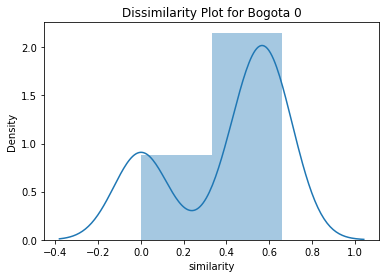

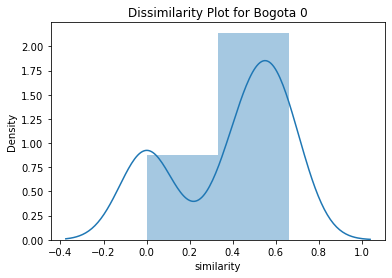

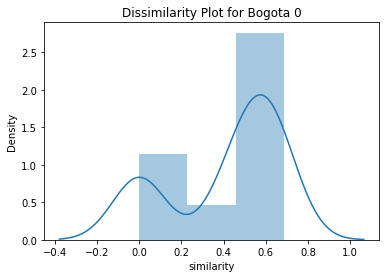

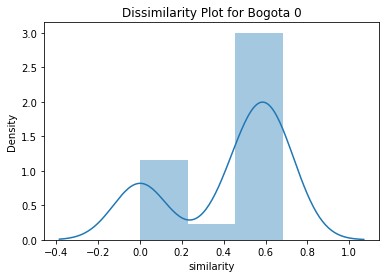

In [35]:
import seaborn as sns 

for df in [stage1_bogota0_high_similarity, stage2_bogota0_high_similarity, stage3_bogota0_high_similarity
                                        , stage4_bogota0_high_similarity]:
    plt.figure()
    plt.title("Dissimilarity Plot for Bogota 0")
    sns.distplot((np.log(1-df['similarity']+1)))

>> The plots are not particularly skewed, for bogota 0 ( no transparency ) is a bimodal. We can look at the mean since they are not particularly skewed. 

## Dissimilarity Plot for Bogota 1

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

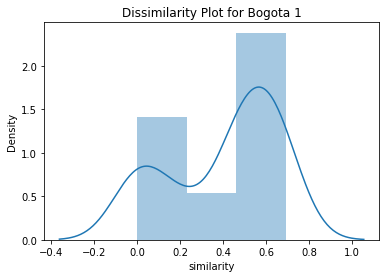

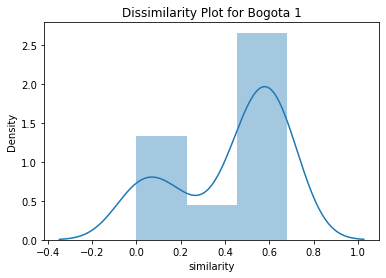

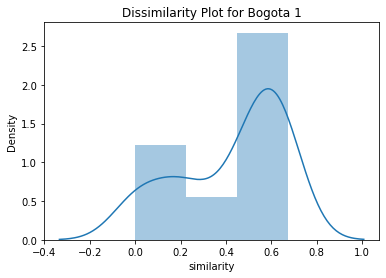

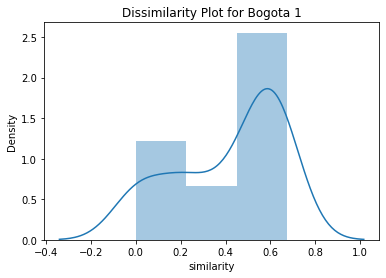

In [36]:
import seaborn as sns 

for df in [stage1_bogota1_high_similarity, stage2_bogota1_high_similarity, stage3_bogota1_high_similarity
                                        , stage4_bogota1_high_similarity]:
    plt.figure()
    plt.title("Dissimilarity Plot for Bogota 1")
    sns.distplot((np.log(1-df['similarity']+1)))

## Dissimilarity Plot for Bogota 2

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

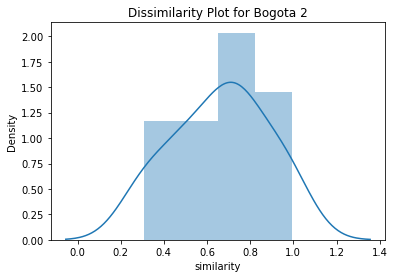

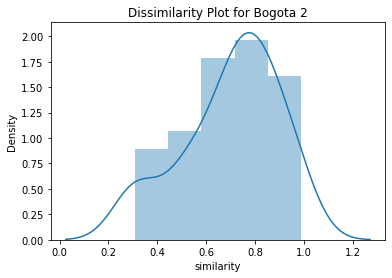

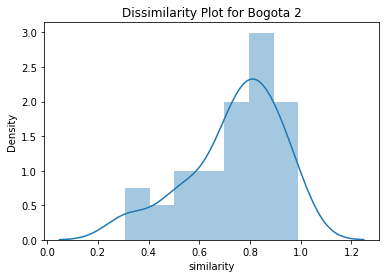

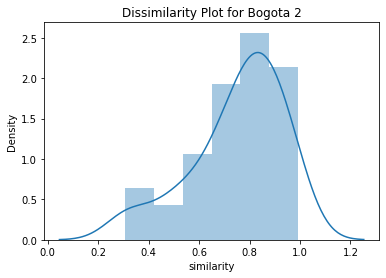

In [37]:
import seaborn as sns 

for df in [stage1_bogota2_high_similarity, stage2_bogota2_high_similarity, stage3_bogota2_high_similarity
                                        , stage4_bogota2_high_similarity]:
    plt.figure()
    plt.title("Dissimilarity Plot for Bogota 2")
    sns.distplot((1-np.log(df['similarity']+1)))

## Disimilarity Plot for Bogota 3

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

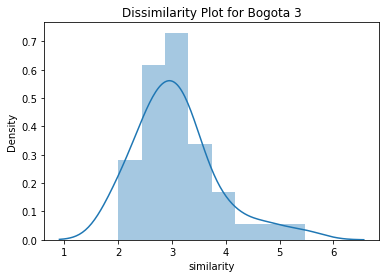

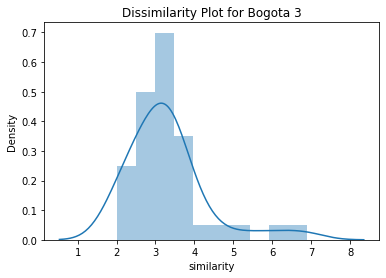

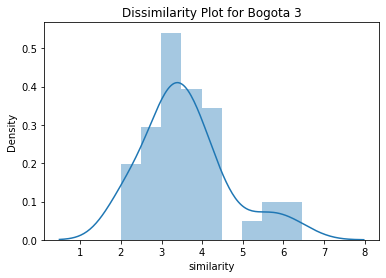

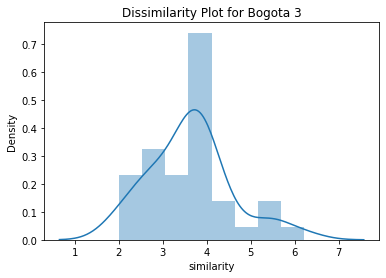

In [38]:
import seaborn as sns 

for df in [stage1_bogota3_high_similarity, stage2_bogota3_high_similarity, stage3_bogota3_high_similarity , stage4_bogota3_high_similarity]:
    plt.figure()
    plt.title("Dissimilarity Plot for Bogota 3")
    sns.distplot((1-np.log(df['similarity']))+1)

> Interpretation: The distributions of the dissimilarity is approximately normal which suggests that we can look at the mean. 

In [39]:
median_log_bogota3 = []
median_log_bogota2 = []
median_log_bogota1 = []
median_log_bogota0 = []

mean_log_bogota3 = []
mean_log_bogota2 = []
mean_log_bogota1 = []
mean_log_bogota0 = []

max_log_bogota3 = []
max_log_bogota2 = []
max_log_bogota1 = []
max_log_bogota0 = []

min_log_bogota3 = []
min_log_bogota2 = []
min_log_bogota1 = []
min_log_bogota0 = []

for df in [stage1_bogota3_high_similarity, stage2_bogota3_high_similarity, stage3_bogota3_high_similarity,  stage4_bogota3_high_similarity]:
    median_value = np.log((1-df['similarity'])+1).median()
    mean_value = np.log((1-df['similarity'])+1).mean()
    max_value = np.log((1-df['similarity'])+1).max()
    max_log_bogota3.append(max_value)
    min_value = np.log((1-df['similarity'])+1).min()
    min_log_bogota3.append(min_value)
    median_log_bogota3.append(median_value)
    mean_log_bogota3.append(mean_value)

for df in [stage1_bogota2_high_similarity, stage2_bogota2_high_similarity, stage3_bogota2_high_similarity, stage4_bogota2_high_similarity]:
    median_value = np.log((1-df['similarity'])+1).median()
    mean_value = np.log((1-df['similarity'])+1).mean()
    max_value = np.log((1-df['similarity'])+1).max()
    min_value = np.log((1-df['similarity'])+1).min()
    min_log_bogota2.append(min_value)
    max_log_bogota2.append(max_value)
    median_log_bogota2.append(median_value)
    mean_log_bogota2.append(mean_value)
    
for df in [stage1_bogota1_high_similarity, stage2_bogota1_high_similarity, stage3_bogota1_high_similarity, stage4_bogota1_high_similarity]:
    median_value = np.log((1-df['similarity'])+1).median()
    mean_value = np.log((1-df['similarity'])+1).mean()
    max_value = np.log((1-df['similarity'])+1).max()
    min_value = np.log((1-df['similarity'])+1).min()
    min_log_bogota1.append(min_value)
    max_log_bogota1.append(max_value)
    median_log_bogota1.append(median_value)
    mean_log_bogota1.append(mean_value)

for df in [stage1_bogota0_high_similarity, stage2_bogota0_high_similarity, stage3_bogota0_high_similarity, stage4_bogota0_high_similarity]:
    median_value = np.log((1-df['similarity'])+1).median()
    mean_value = np.log((1-df['similarity'])+1).mean()
    max_value = np.log((1-df['similarity'])+1).max()
    min_value = np.log((1-df['similarity'])+1).min()
    min_log_bogota0.append(min_value)
    max_log_bogota0.append(max_value)
    median_log_bogota0.append(median_value)
    mean_log_bogota0.append(mean_value)

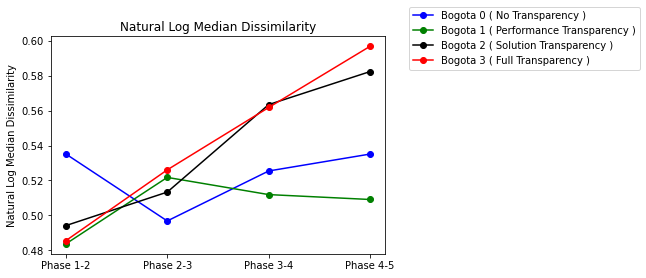

In [40]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = median_log_bogota0
y2 = median_log_bogota1
y3 = median_log_bogota2
y4 = median_log_bogota3

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Natural Log Median Dissimilarity")
plt.ylabel("Natural Log Median Dissimilarity")
plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

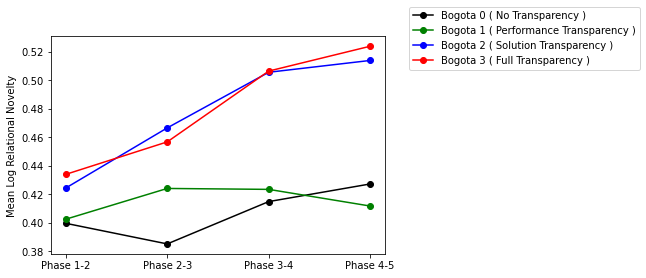

In [41]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = mean_log_bogota0
y2 = mean_log_bogota1
y3 = mean_log_bogota2
y4 = mean_log_bogota3

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'bo-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.ylabel("Mean Log Relational Novelty")
plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

> goes into paper

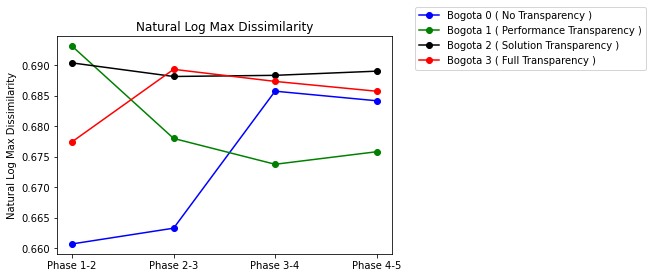

In [42]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = max_log_bogota0
y2 = max_log_bogota1
y3 = max_log_bogota2
y4 = max_log_bogota3

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Natural Log Max Dissimilarity")
plt.ylabel("Natural Log Max Dissimilarity")
plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

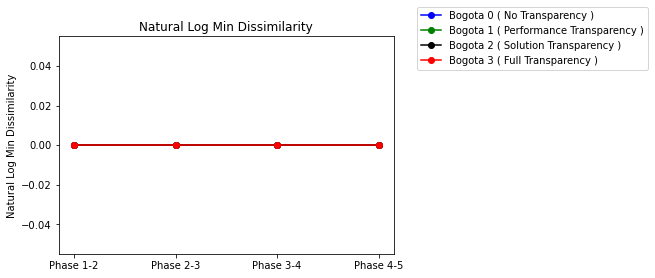

In [43]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = min_log_bogota0
y2 = min_log_bogota1
y3 = min_log_bogota2
y4 = min_log_bogota3

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Natural Log Min Dissimilarity")
plt.ylabel("Natural Log Min Dissimilarity")
plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

In [44]:
# T-tests between Bogota 3 and Bogota 1

import pandas as pd
import inspect

def retrieve_name(var):
   callers_local_vars = inspect.currentframe().f_back.f_globals.items()
   return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]

list1,list2 = [stage1_bogota3_high_similarity, stage2_bogota3_high_similarity, stage3_bogota3_high_similarity,  stage4_bogota3_high_similarity],  [stage1_bogota1_high_similarity, stage2_bogota1_high_similarity, stage3_bogota1_high_similarity,  stage4_bogota1_high_similarity]
results = []
for x in range(len(list1)):
    for y in range(len(list2)):
        
        name_list1 = retrieve_name(list1[x])
        name_list2 = retrieve_name(list2[y])
        ttest_result = ttest_ind(np.log(1-list1[x]['similarity']+1), np.log(1-list2[y]['similarity']+1), equal_var = False, alternative = 'greater')
        results.append([name_list1, name_list2, ttest_result[0], ttest_result[1]])
        
df = pd.DataFrame(results, columns=["group1", "group2", "statistics", "pvalue"])
df[df.group1.str.split("_", expand=True)[0] == df.group2.str.split("_", expand=True)[0]]
        

group1                          group2  \
0   stage1_bogota3_high_similarity  stage1_bogota1_high_similarity   
5   stage2_bogota3_high_similarity  stage2_bogota1_high_similarity   
10  stage3_bogota3_high_similarity  stage3_bogota1_high_similarity   
15  stage4_bogota3_high_similarity  stage4_bogota1_high_similarity   

    statistics    pvalue  
0     0.634008  0.264033  
5     0.662789  0.254744  
10    1.751778  0.041936  
15    2.409553  0.009266

In [45]:
# T-tests between Bogota 3 and Bogota 0

import pandas as pd
import inspect

def retrieve_name(var):
   callers_local_vars = inspect.currentframe().f_back.f_globals.items()
   return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]

list1,list2 = [stage1_bogota3_high_similarity, stage2_bogota3_high_similarity, stage3_bogota3_high_similarity,  stage4_bogota3_high_similarity],  [stage1_bogota0_high_similarity, stage2_bogota0_high_similarity, stage3_bogota0_high_similarity,  stage4_bogota0_high_similarity]
results = []
for x in range(len(list1)):
    for y in range(len(list2)):
        
        name_list1 = retrieve_name(list1[x])
        name_list2 = retrieve_name(list2[y])
        ttest_result = ttest_ind(np.log(1-list1[x]['similarity']+1), np.log(1-list2[y]['similarity']+1), equal_var=False, alternative = 'greater')
        results.append([name_list1, name_list2, ttest_result[0], ttest_result[1]])
        
df = pd.DataFrame(results, columns=["group1", "group2", "statistics", "pvalue"])
df[df.group1.str.split("_", expand=True)[0] == df.group2.str.split("_", expand=True)[0]]

group1                          group2  \
0   stage1_bogota3_high_similarity  stage1_bogota0_high_similarity   
5   stage2_bogota3_high_similarity  stage2_bogota0_high_similarity   
10  stage3_bogota3_high_similarity  stage3_bogota0_high_similarity   
15  stage4_bogota3_high_similarity  stage4_bogota0_high_similarity   

    statistics    pvalue  
0     0.659844  0.255808  
5     1.370606  0.087461  
10    1.765862  0.040968  
15    1.888433  0.031768

In [46]:
# T-tests between Bogota 3 and Bogota 2

import pandas as pd
import inspect

def retrieve_name(var):
   callers_local_vars = inspect.currentframe().f_back.f_globals.items()
   return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]

list1,list2 = [stage1_bogota3_high_similarity, stage2_bogota3_high_similarity, stage3_bogota3_high_similarity,  stage4_bogota3_high_similarity],  [stage1_bogota2_high_similarity, stage2_bogota2_high_similarity, stage3_bogota2_high_similarity,  stage4_bogota2_high_similarity]
results = []
for x in range(len(list1)):
    for y in range(len(list2)):
        
        name_list1 = retrieve_name(list1[x])
        name_list2 = retrieve_name(list2[y])
        ttest_result = ttest_ind(np.log(1-list1[x]['similarity']+1), np.log(1-list2[y]['similarity']+1), equal_var=False, alternative = 'greater')
        results.append([name_list1, name_list2, ttest_result[0], ttest_result[1]])
        
df = pd.DataFrame(results, columns=["group1", "group2", "statistics", "pvalue"])
df[df.group1.str.split("_", expand=True)[0] == df.group2.str.split("_", expand=True)[0]]

group1                          group2  \
0   stage1_bogota3_high_similarity  stage1_bogota2_high_similarity   
5   stage2_bogota3_high_similarity  stage2_bogota2_high_similarity   
10  stage3_bogota3_high_similarity  stage3_bogota2_high_similarity   
15  stage4_bogota3_high_similarity  stage4_bogota2_high_similarity   

    statistics    pvalue  
0     0.164629  0.435122  
5    -0.222177  0.587629  
10    0.020588  0.491813  
15    0.256585  0.399079

In [47]:
# T-tests between Bogota 2 and Bogota 0

import pandas as pd
import inspect

def retrieve_name(var):
   callers_local_vars = inspect.currentframe().f_back.f_globals.items()
   return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]

list1,list2 = [stage1_bogota2_high_similarity, stage2_bogota2_high_similarity, stage3_bogota2_high_similarity,  stage4_bogota2_high_similarity],  [stage1_bogota0_high_similarity, stage2_bogota0_high_similarity, stage3_bogota0_high_similarity,  stage4_bogota0_high_similarity]
results = []
for x in range(len(list1)):
    for y in range(len(list2)):
        
        name_list1 = retrieve_name(list1[x])
        name_list2 = retrieve_name(list2[y])
        ttest_result = ttest_ind(np.log(1-list1[x]['similarity']+1), np.log(1-list2[y]['similarity']+1), equal_var = False, alternative = 'greater')
        results.append([name_list1, name_list2, ttest_result[0], ttest_result[1]])
        
df = pd.DataFrame(results, columns=["group1", "group2", "statistics", "pvalue"])
df[df.group1.str.split("_", expand=True)[0] == df.group2.str.split("_", expand=True)[0]]

group1                          group2  \
0   stage1_bogota2_high_similarity  stage1_bogota0_high_similarity   
5   stage2_bogota2_high_similarity  stage2_bogota0_high_similarity   
10  stage3_bogota2_high_similarity  stage3_bogota0_high_similarity   
15  stage4_bogota2_high_similarity  stage4_bogota0_high_similarity   

    statistics    pvalue  
0     0.376801  0.354053  
5     1.550599  0.062759  
10    1.797654  0.038470  
15    1.695016  0.047489

In [48]:
# T-tests between Bogota 1 and Bogota 0

import pandas as pd
import inspect

def retrieve_name(var):
   callers_local_vars = inspect.currentframe().f_back.f_globals.items()
   return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]

list1,list2 = [stage1_bogota1_high_similarity, stage2_bogota1_high_similarity, stage3_bogota1_high_similarity,  stage4_bogota1_high_similarity],  [stage1_bogota0_high_similarity, stage2_bogota0_high_similarity, stage3_bogota0_high_similarity,  stage4_bogota0_high_similarity]
results = []
for x in range(len(list1)):
    for y in range(len(list2)):
        
        name_list1 = retrieve_name(list1[x])
        name_list2 = retrieve_name(list2[y])
        ttest_result = ttest_ind(np.log(1-list1[x]['similarity']+1), np.log(1-list2[y]['similarity']+1), equal_var = False, alternative = 'greater')
        results.append([name_list1, name_list2, ttest_result[0], ttest_result[1]])
        
df = pd.DataFrame(results, columns=["group1", "group2", "statistics", "pvalue"])
df[df.group1.str.split("_", expand=True)[0] == df.group2.str.split("_", expand=True)[0]]

group1                          group2  \
0   stage1_bogota1_high_similarity  stage1_bogota0_high_similarity   
5   stage2_bogota1_high_similarity  stage2_bogota0_high_similarity   
10  stage3_bogota1_high_similarity  stage3_bogota0_high_similarity   
15  stage4_bogota1_high_similarity  stage4_bogota0_high_similarity   

    statistics    pvalue  
0     0.049363  0.480381  
5     0.684383  0.247922  
10    0.152931  0.439435  
15   -0.270980  0.606419

## Mann Whitneyu Test

In [49]:
# T-tests between Bogota 3 and Bogota 1

import pandas as pd
import inspect

def retrieve_name(var):
   callers_local_vars = inspect.currentframe().f_back.f_globals.items()
   return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]

list1,list2 = [stage1_bogota3_high_similarity, stage2_bogota3_high_similarity, stage3_bogota3_high_similarity,  stage4_bogota3_high_similarity],  [stage1_bogota1_high_similarity, stage2_bogota1_high_similarity, stage3_bogota1_high_similarity,  stage4_bogota1_high_similarity]
results = []
for x in range(len(list1)):
    for y in range(len(list2)):
        
        name_list1 = retrieve_name(list1[x])
        name_list2 = retrieve_name(list2[y])
        mann_result = mannwhitneyu(np.log(1-list1[x]['similarity']+1), np.log(1-list2[y]['similarity']+1), alternative = 'greater')
        results.append([name_list1, name_list2, ttest_result[0], mann_result[1]])
        
df = pd.DataFrame(results, columns=["group1", "group2", "statistics", "pvalue"])
df[df.group1.str.split("_", expand=True)[0] == df.group2.str.split("_", expand=True)[0]]
        

group1                          group2  \
0   stage1_bogota3_high_similarity  stage1_bogota1_high_similarity   
5   stage2_bogota3_high_similarity  stage2_bogota1_high_similarity   
10  stage3_bogota3_high_similarity  stage3_bogota1_high_similarity   
15  stage4_bogota3_high_similarity  stage4_bogota1_high_similarity   

    statistics    pvalue  
0     -0.27098  0.573229  
5     -0.27098  0.494340  
10    -0.27098  0.072724  
15    -0.27098  0.022532

In [50]:
# T-tests between Bogota 3 and Bogota 2

import pandas as pd
import inspect

def retrieve_name(var):
   callers_local_vars = inspect.currentframe().f_back.f_globals.items()
   return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]

list1,list2 = [stage1_bogota3_high_similarity, stage2_bogota3_high_similarity, stage3_bogota3_high_similarity,  stage4_bogota3_high_similarity],  [stage1_bogota2_high_similarity, stage2_bogota2_high_similarity, stage3_bogota2_high_similarity,  stage4_bogota2_high_similarity]
results = []
for x in range(len(list1)):
    for y in range(len(list2)):
        
        name_list1 = retrieve_name(list1[x])
        name_list2 = retrieve_name(list2[y])
        mann_result = mannwhitneyu(np.log(1-list1[x]['similarity']+1), np.log(1-list2[y]['similarity']+1), alternative = 'greater')
        results.append([name_list1, name_list2, ttest_result[0], mann_result[1]])
        
df = pd.DataFrame(results, columns=["group1", "group2", "statistics", "pvalue"])
df[df.group1.str.split("_", expand=True)[0] == df.group2.str.split("_", expand=True)[0]]
        

group1                          group2  \
0   stage1_bogota3_high_similarity  stage1_bogota2_high_similarity   
5   stage2_bogota3_high_similarity  stage2_bogota2_high_similarity   
10  stage3_bogota3_high_similarity  stage3_bogota2_high_similarity   
15  stage4_bogota3_high_similarity  stage4_bogota2_high_similarity   

    statistics    pvalue  
0     -0.27098  0.487727  
5     -0.27098  0.653351  
10    -0.27098  0.388614  
15    -0.27098  0.314788

In [51]:
# T-tests between Bogota 3 and Bogota 0

import pandas as pd
import inspect

def retrieve_name(var):
   callers_local_vars = inspect.currentframe().f_back.f_globals.items()
   return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]

list1,list2 = [stage1_bogota3_high_similarity, stage2_bogota3_high_similarity, stage3_bogota3_high_similarity,  stage4_bogota3_high_similarity],  [stage1_bogota0_high_similarity, stage2_bogota0_high_similarity, stage3_bogota0_high_similarity,  stage4_bogota0_high_similarity]
results = []
for x in range(len(list1)):
    for y in range(len(list2)):
        
        name_list1 = retrieve_name(list1[x])
        name_list2 = retrieve_name(list2[y])
        mann_result = mannwhitneyu(np.log(1-list1[x]['similarity']+1), np.log(1-list2[y]['similarity']+1), alternative = 'greater')
        results.append([name_list1, name_list2, ttest_result[0], mann_result[1]])
        
df = pd.DataFrame(results, columns=["group1", "group2", "statistics", "pvalue"])
df[df.group1.str.split("_", expand=True)[0] == df.group2.str.split("_", expand=True)[0]]
        

group1                          group2  \
0   stage1_bogota3_high_similarity  stage1_bogota0_high_similarity   
5   stage2_bogota3_high_similarity  stage2_bogota0_high_similarity   
10  stage3_bogota3_high_similarity  stage3_bogota0_high_similarity   
15  stage4_bogota3_high_similarity  stage4_bogota0_high_similarity   

    statistics    pvalue  
0     -0.27098  0.729375  
5     -0.27098  0.242090  
10    -0.27098  0.088035  
15    -0.27098  0.121937

In [52]:
# to be used in correlation notebook 

%store stage1_bogota0_high_similarity
%store stage1_bogota1_high_similarity
%store stage1_bogota2_high_similarity
%store stage1_bogota3_high_similarity

%store stage2_bogota0_high_similarity
%store stage2_bogota1_high_similarity
%store stage2_bogota2_high_similarity
%store stage2_bogota3_high_similarity

%store stage3_bogota0_high_similarity
%store stage3_bogota1_high_similarity
%store stage3_bogota2_high_similarity
%store stage3_bogota3_high_similarity

%store stage4_bogota0_high_similarity
%store stage4_bogota1_high_similarity
%store stage4_bogota2_high_similarity
%store stage4_bogota3_high_similarity


# to be used in correlation notebook 

%store stage1_bogota0
%store stage1_bogota1
%store stage1_bogota2
%store stage1_bogota3

%store stage2_bogota0
%store stage2_bogota1
%store stage2_bogota2
%store stage2_bogota3

%store stage3_bogota0
%store stage3_bogota1
%store stage3_bogota2
%store stage3_bogota3

%store stage4_bogota0
%store stage4_bogota1
%store stage4_bogota2
%store stage4_bogota3

Stored 'stage1_bogota0_high_similarity' (DataFrame)
Stored 'stage1_bogota1_high_similarity' (DataFrame)
Stored 'stage1_bogota2_high_similarity' (DataFrame)
Stored 'stage1_bogota3_high_similarity' (DataFrame)
Stored 'stage2_bogota0_high_similarity' (DataFrame)
Stored 'stage2_bogota1_high_similarity' (DataFrame)
Stored 'stage2_bogota2_high_similarity' (DataFrame)
Stored 'stage2_bogota3_high_similarity' (DataFrame)
Stored 'stage3_bogota0_high_similarity' (DataFrame)
Stored 'stage3_bogota1_high_similarity' (DataFrame)
Stored 'stage3_bogota2_high_similarity' (DataFrame)
Stored 'stage3_bogota3_high_similarity' (DataFrame)
Stored 'stage4_bogota0_high_similarity' (DataFrame)
Stored 'stage4_bogota1_high_similarity' (DataFrame)
Stored 'stage4_bogota2_high_similarity' (DataFrame)
Stored 'stage4_bogota3_high_similarity' (DataFrame)
Stored 'stage1_bogota0' (DataFrame)
Stored 'stage1_bogota1' (DataFrame)
Stored 'stage1_bogota2' (DataFrame)
Stored 'stage1_bogota3' (DataFrame)
Stored 'stage2_bogota0' 

> Without considering the effect of time, bogota 0 is different from bogota 3. Theoretically, transparency will lead to 
convergence from Bodreau and Bernstein paper. The first mechanism is about reuse and cognitive fixation. This mechanism is
explaining what solution transparency does. As a result, we might compare only 2 groups, those with and without solution transparency, and we would find that the 
opposite is through. 

> The second mechanism is social aspirations. March and Shapiro's paper on social aspirations. Brunswicker 2020 also explain that. 
The groups with performance transparency will have reference points that motivate them to jump and innovate if they are below the best. 
As a result, we might also compare those with and without performance transparency. 

> Run a t-test for each plot and phase. 


## Comments 

> Significant difference Between Full Transparency and No Transparency 

* Stage 2 - 0.034952
* Stage 3 - 0.048080